# Customer Personality Analysis

## Introduction

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content
#### Attributes
**People**

- `ID`: Customer's unique identifier  
- `Year_Birth`: Customer's birth year  
- `Education`: Customer's education level  
- `Marital_Status`: Customer's marital status  
- `Income`: Customer's yearly household income  
- `Kidhome`: Number of children in customer's household  
- `Teenhome`: Number of teenagers in customer's household  
- `Dt_Customer`: Date of customer's enrollment with the company  
- `Recency`: Number of days since customer's last purchase  
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise  

**Products**

- `MntWines`: Amount spent on wine in last 2 years  
- `MntFruits`: Amount spent on fruits in last 2 years  
- `MntMeatProducts`: Amount spent on meat in last 2 years  
- `MntFishProducts`: Amount spent on fish in last 2 years  
- `MntSweetProducts`: Amount spent on sweets in last 2 years  
- `MntGoldProds`: Amount spent on gold in last 2 years  

**Promotion**

- `NumDealsPurchases`: Number of purchases made with a discount  
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise  

**Place**

- `NumWebPurchases`: Number of purchases made through the company’s website  
- `NumCatalogPurchases`: Number of purchases made using a catalogue  
- `NumStorePurchases`: Number of purchases made directly in stores  
- `NumWebVisitsMonth`: Number of visits to company’s website in the last month  

**Target**
Need to perform clustering to summarize customer segments.

## 1. Data Preparation

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from utils import clustering as cl
from itertools import product

In [ ]:
try:
    os.makedirs("./datasets/customers", exist_ok=True)
except:
    pass

In [ ]:
# # Downloading data
# extract_path = "./datasets/customers"
# link = "https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis"
# od.download(link, extract_path)

# # Already done!

In [ ]:
filepath = "/work/datasets/customers/customer-personality-analysis/marketing_campaign.csv"
data = pd.read_csv(filepath, sep="\t", header=0)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
data.size

64960

In [ ]:
cols_people = ["Income", "Kidhome", "Teenhome"]
cols_products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
cols_places = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

In [ ]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Finding missing values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data["Income"]

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [ ]:
missing_income = (data["Income"].isna().sum() / data["Income"].size) * 100
print(f"Missing Income: {missing_income:.2f} %")

Missing Income: 1.07 %


In [ ]:
# Filling missing values
data["Income"].fillna(data["Income"].mean(), inplace=True)

In [ ]:
print(data.isna().sum().sum())

0


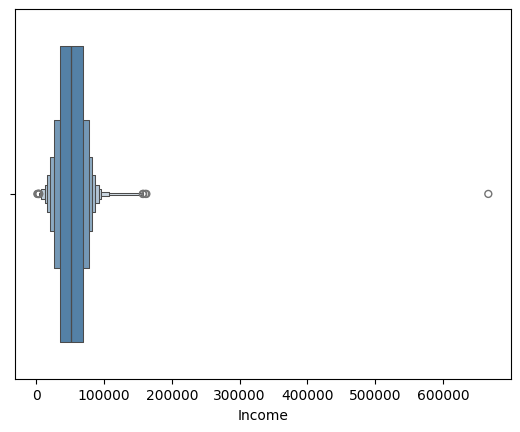

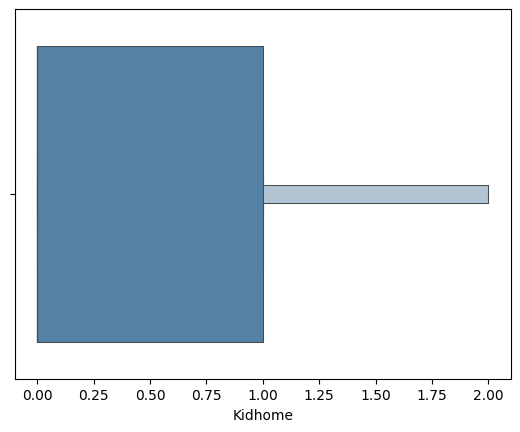

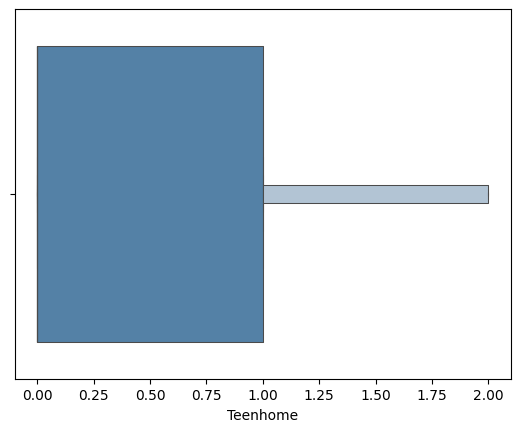

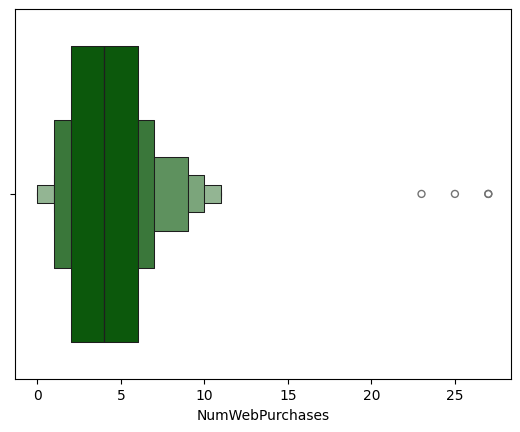

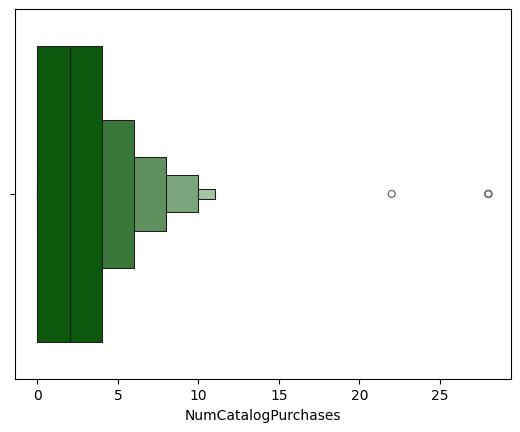

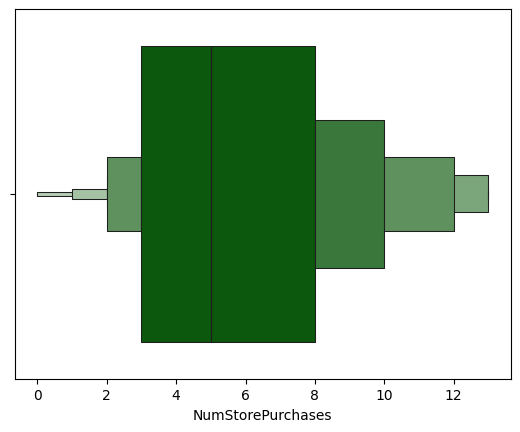

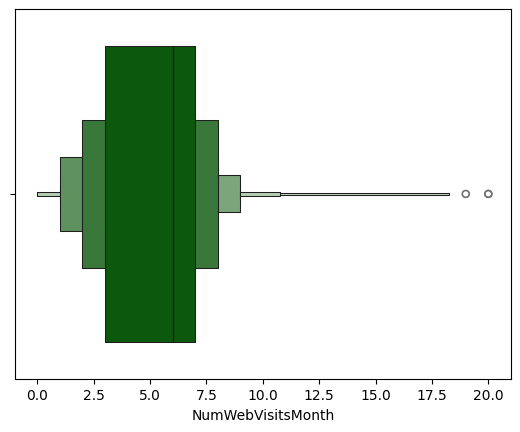

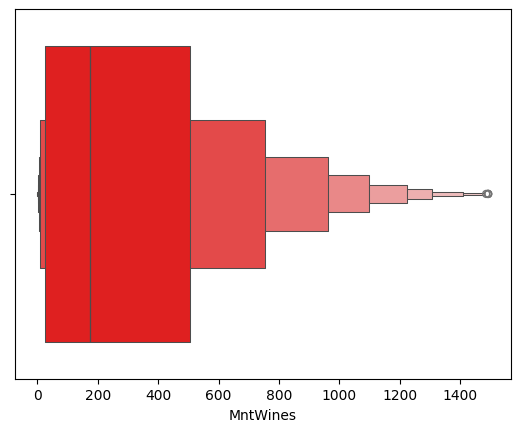

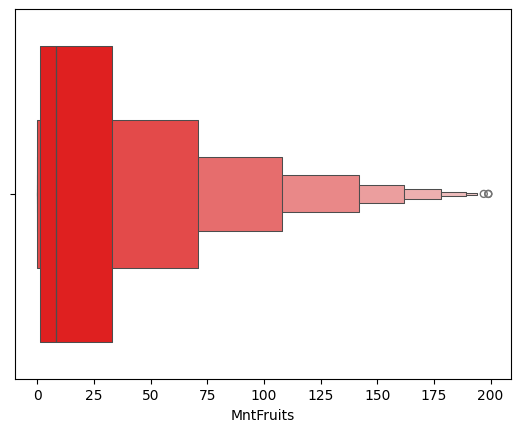

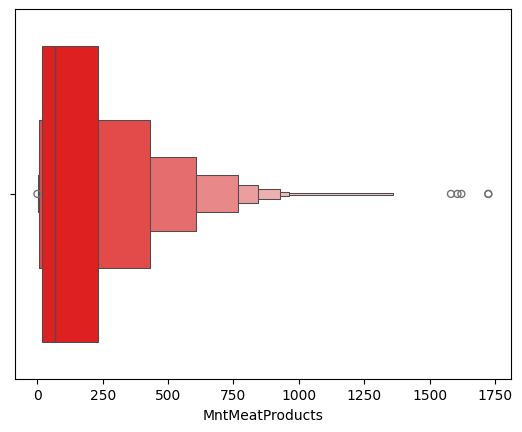

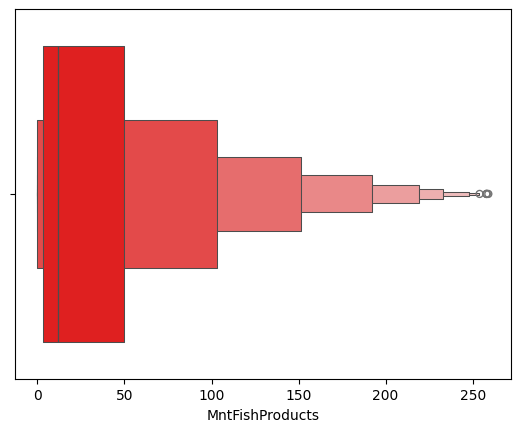

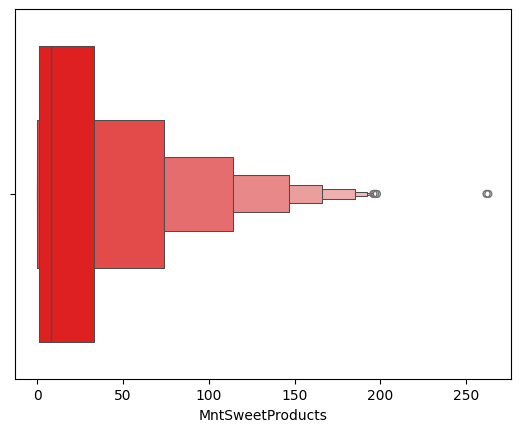

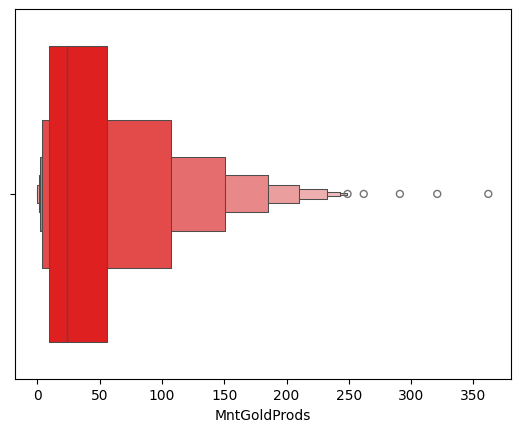

In [ ]:
# Visualizing distribution
for _ in cols_people:
    sns.boxenplot(x=data[_], color="steelblue", showfliers=True)
    plt.show()

for _ in cols_places:
    sns.boxenplot(x=data[_], color="darkgreen", showfliers=True)
    plt.show()

for _ in cols_products:
    sns.boxenplot(x=data[_], color="red", showfliers=True)
    plt.show()

In [ ]:
features = data[list(set(cols_people + cols_places + cols_products))]
cv_data = features.describe().loc["std"] / features.describe().loc["mean"]
pd.DataFrame(cv_data).reset_index().rename(columns={"index": "Feature", 0: "CV"}).sort_values("CV", ascending=True)

,Feature,CV
5,NumWebVisitsMonth,0.456435
11,Income,0.479217
7,NumStorePurchases,0.561461
6,NumWebPurchases,0.680254
8,Teenhome,1.075631
12,NumCatalogPurchases,1.098062
3,MntWines,1.107462
4,MntGoldProds,1.185034
10,Kidhome,1.212072
0,MntMeatProducts,1.351994


From distribution boxenplots, it is possible to appreciate that no extreme deviated values are present (except for Income). Outliers present are natural due to consumers spending more than usual, this is reflected on coeffcient of variation presented in the table above, where values don't deviate substantially from 1.

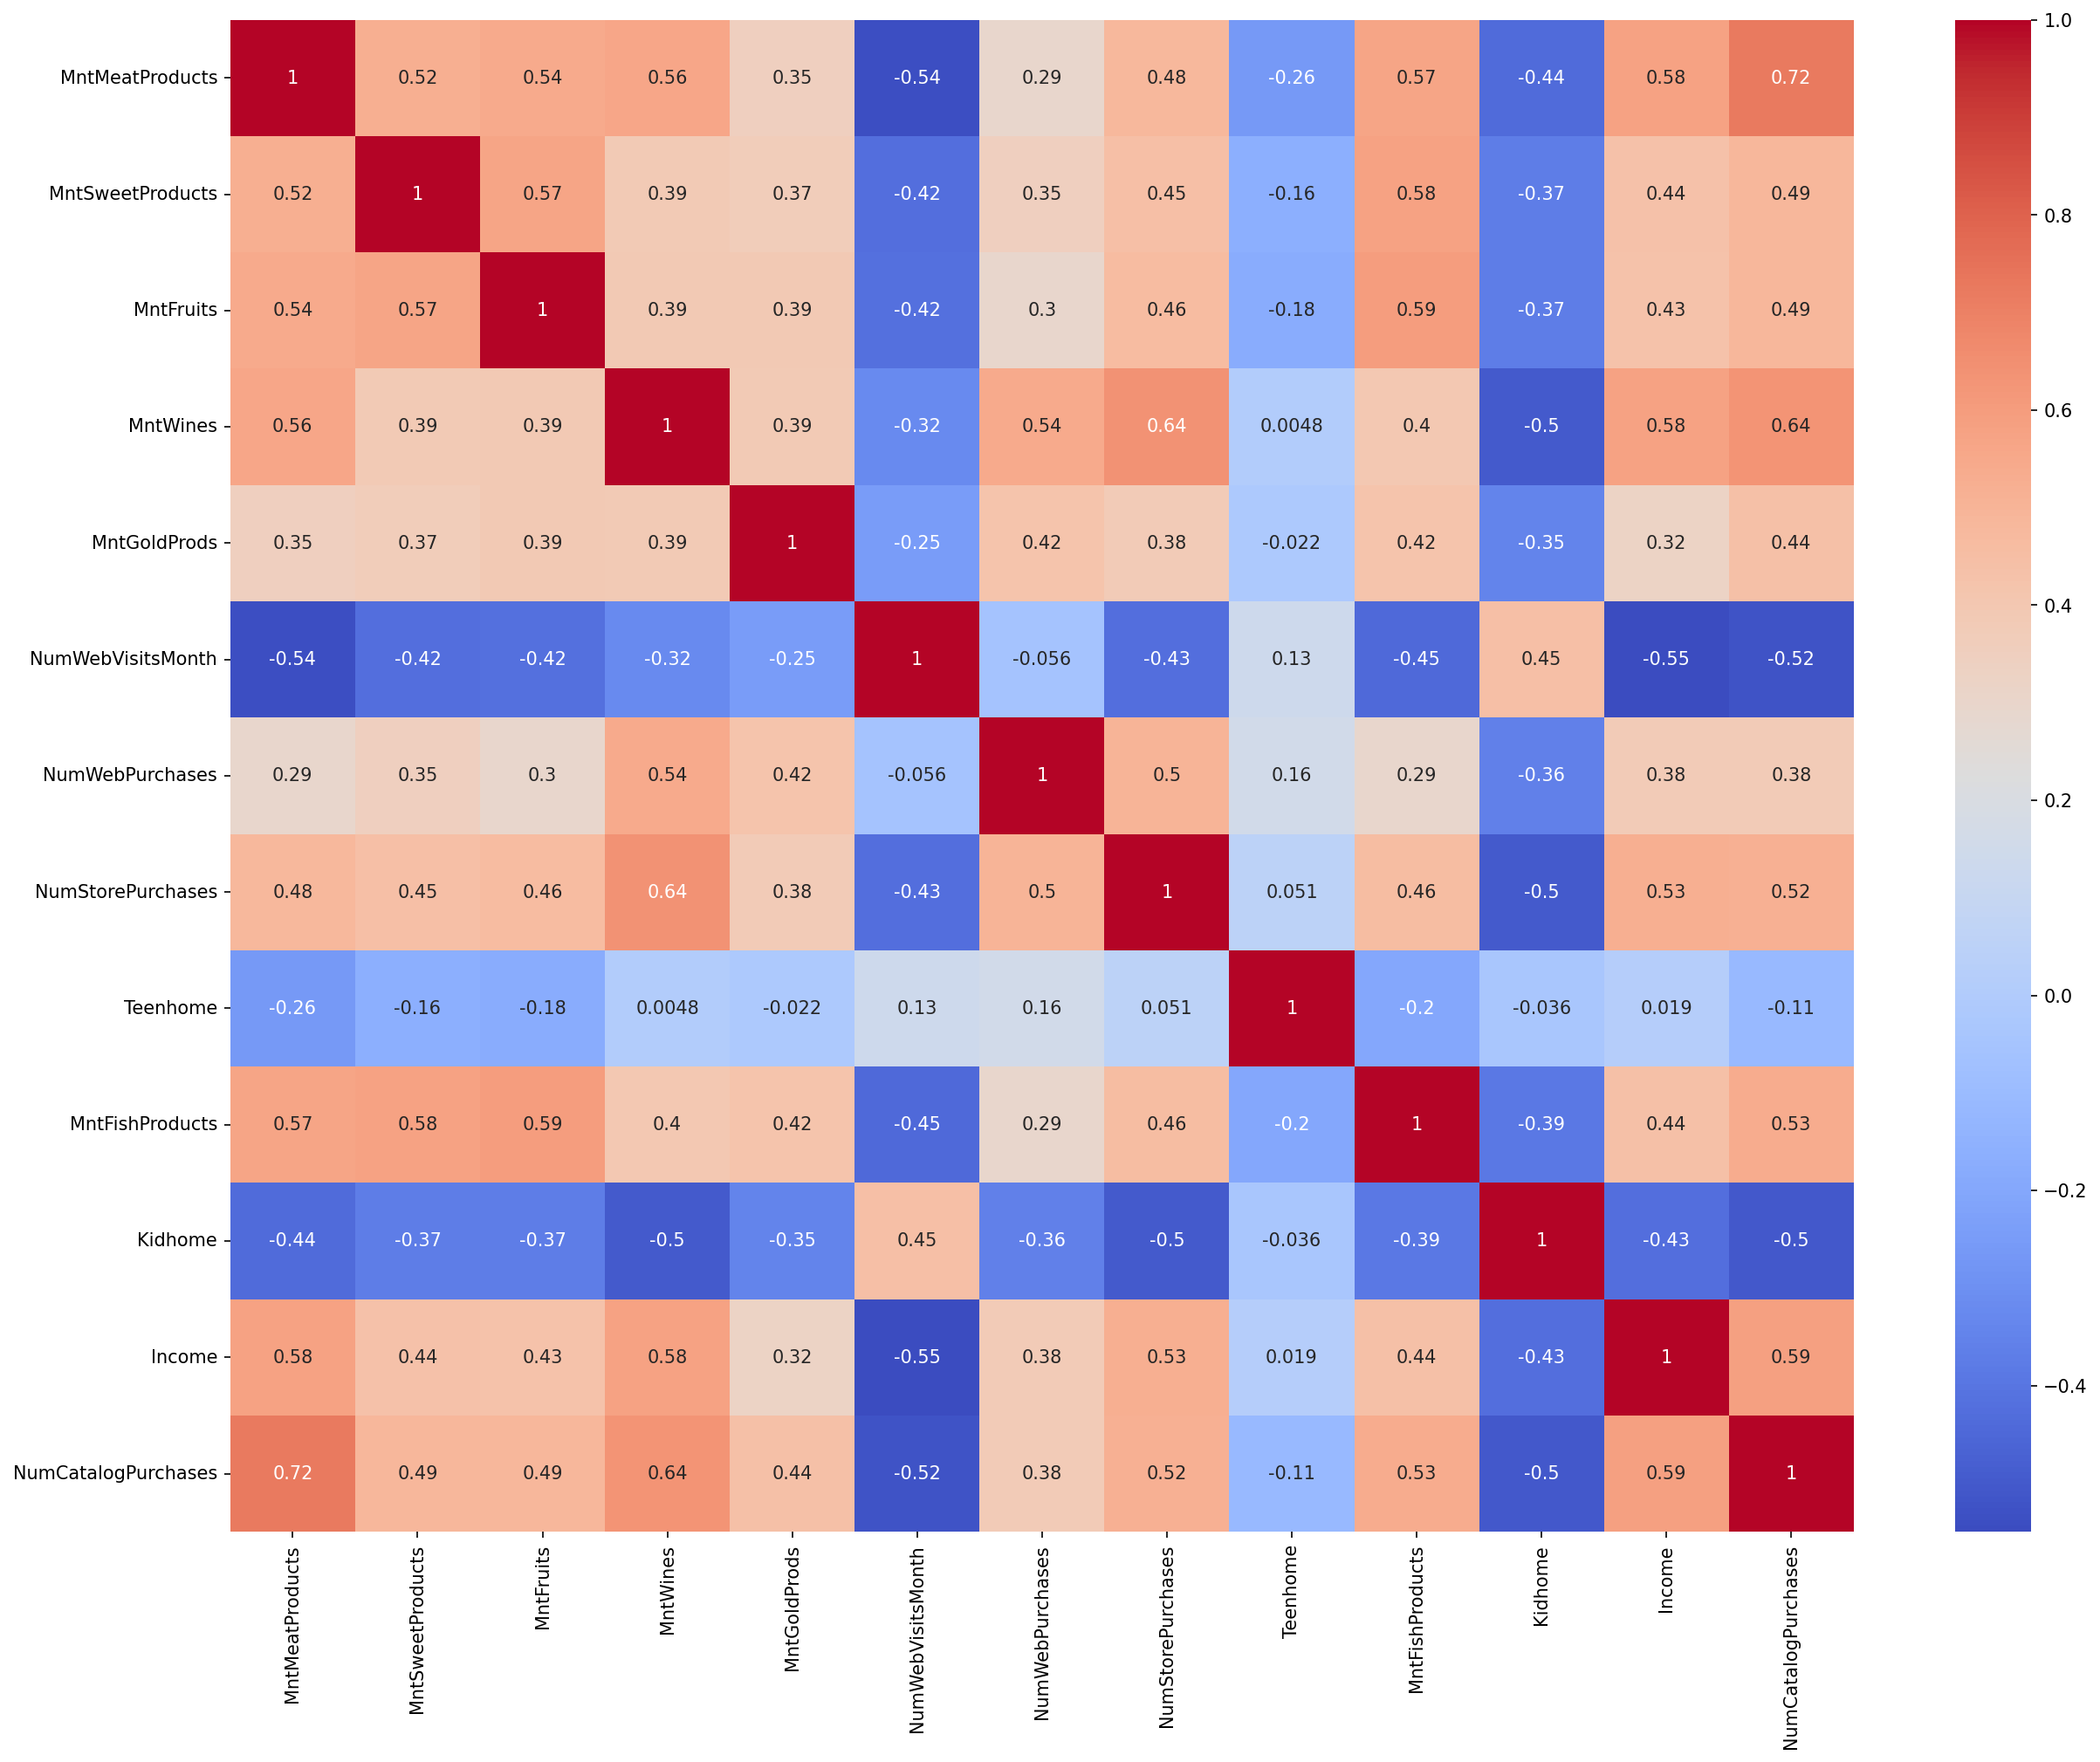

In [ ]:
# Heatmap for correlation among variables.
fig = plt.figure(figsize=(20, 15), dpi=150)
sns.heatmap(data=features.corr(), annot=True, cmap="coolwarm", cbar=True, annot_kws={"size": 10})
plt.show()

Colinearity among variables is not an issue, according to correlation heatmap, no variables are strongly correlated.

## 2. Data Processing for Clustering



In [ ]:
# Consumer purchasing behavior data to scale.
data[cols_products]

# Consumer purchasing place data to scale.
data[cols_places]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,8,10,4,7
1,1,1,2,5
2,8,2,10,4
3,2,0,4,6
4,5,3,6,5
...,...,...,...,...
2235,9,3,4,5
2236,8,2,5,7
2237,2,3,13,6
2238,6,5,10,3


In [ ]:
# Standardizing data from products
sc_products = StandardScaler()
products = sc_products.fit_transform(data[cols_products])

# Standardizing data from places
sc_places = StandardScaler()
places = sc_places.fit_transform(data[cols_places])

In [ ]:
# PCA analysis.
pca_products = PCA()
pca_products.fit(products)
products_scaled = pca_products.transform(products)

pca_places = PCA()
pca_places.fit(places)
places_scaled = pca_places.transform(places)

In [ ]:
# Evaluating explained variance
var_products = pca_products.explained_variance_ratio_
var_places = pca_places.explained_variance_ratio_

# Cumulative sum of explained variance
var_products_cumsum = np.cumsum(np.round(var_products, 3) * 100)
var_places_cumsum = np.cumsum(np.round(var_places, 3) * 100)
print(f"Explained variance of products: {var_products_cumsum[3]}")
print(f"Explained variance of places: {var_places_cumsum[2]}")

Explained variance of products: 87.2
Explained variance of places: 91.4


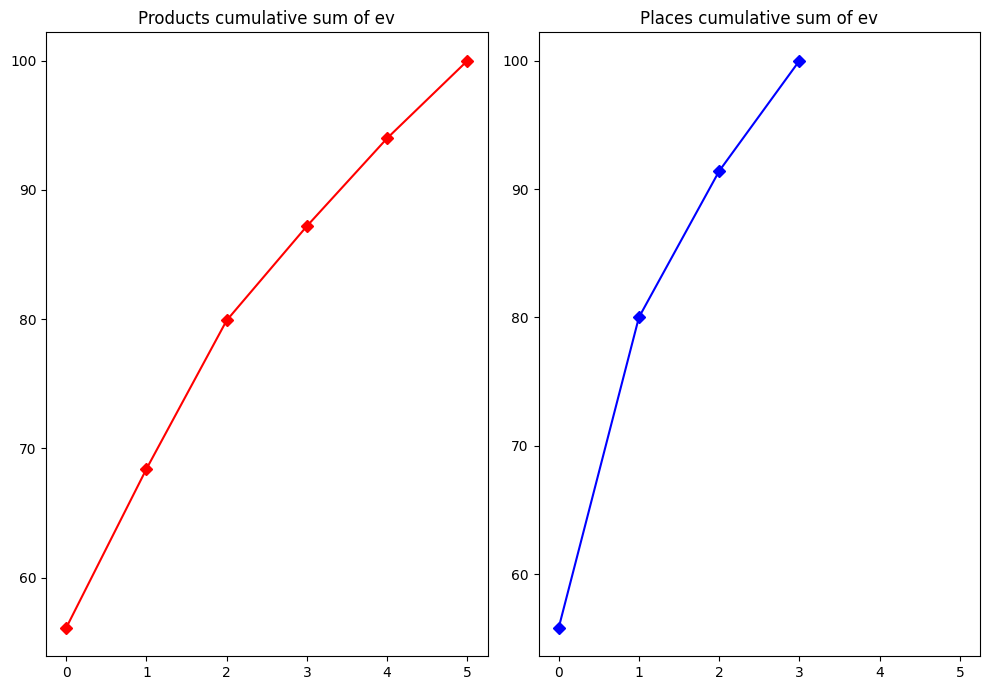

In [ ]:
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, figsize=(10,7), sharex=True)
axes1.plot(var_products_cumsum, "r-D")
axes1.set_title("Products cumulative sum of ev")
axes2.plot(var_places_cumsum, "b-D")
axes2.set_title("Places cumulative sum of ev")
plt.tight_layout()
plt.show()

In [ ]:
# Variance for products is captured by 4 principal components, up to 87.2%.
products_data_standard = pd.DataFrame(products_scaled, columns=cols_products).iloc[:, :4]
products_data_standard

,MntWines,MntFruits,MntMeatProducts,MntFishProducts
0,3.756222,-0.658095,-0.063857,-0.334673
1,-1.708977,-0.314345,0.013012,-0.038194
2,0.819074,-0.327560,0.070616,-0.631753
3,-1.571322,-0.407386,-0.001993,-0.083237
4,-0.181702,-0.730435,-0.082558,-0.242541
...,...,...,...,...
2235,2.948829,1.809378,2.473483,1.763656
2236,-1.248872,0.461866,-0.574034,0.106313
2237,0.671306,0.892774,-1.225284,-0.314010
2238,0.750993,0.128554,0.079031,-0.172149


In [ ]:
# Variance for places is captured by 3 principal components, up to 91.4%.
places_data_standard = pd.DataFrame(places_scaled, columns=cols_places).iloc[:, :3]
places_data_standard

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,-1.364271,0.988773,2.476948
1,1.377354,-0.966314,0.191773
2,-1.436021,0.882247,-0.942942
3,1.255758,-0.289505,-0.335774
4,-0.297181,0.141594,0.056376
...,...,...,...
2235,-0.556344,1.084538,0.631975
2236,-0.018218,1.470851,0.296895
2237,-0.867300,-0.042060,-1.402267
2238,-1.888228,-0.070883,-0.365964


## 3. Evaluating K-Means Clustering Method

For `products` features:

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1325: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


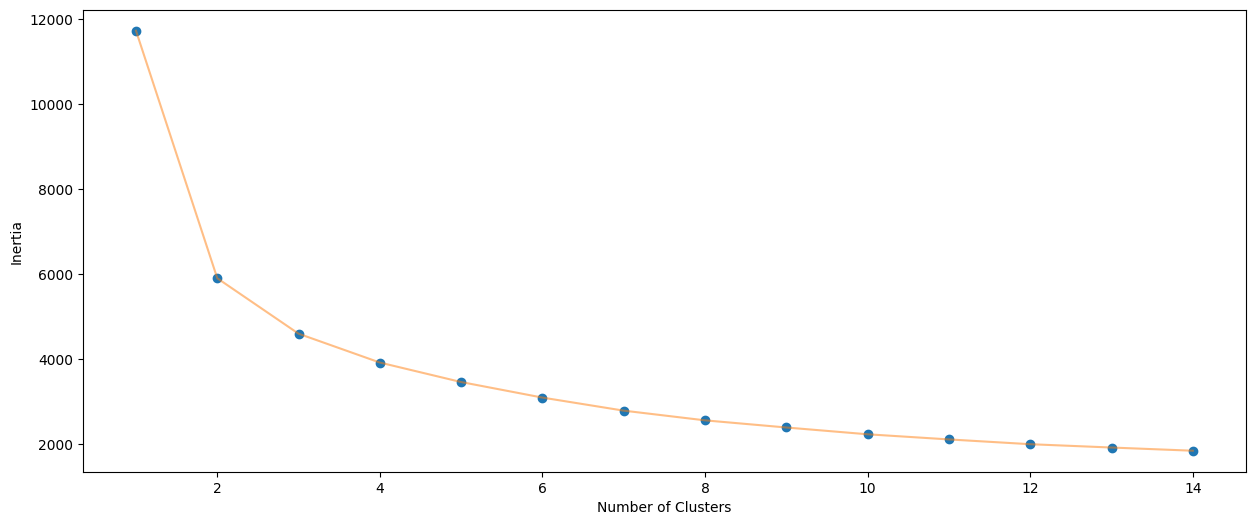

In [ ]:
fig = cl.elbow_plot(data=products_data_standard, cols=products_data_standard.columns, n=15)

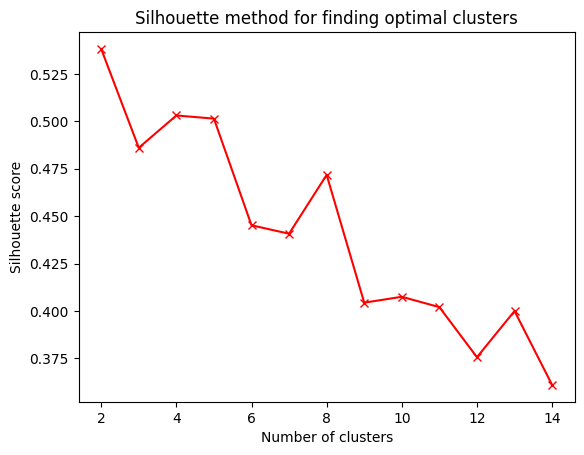

In [ ]:
cl.silhouette_method(data=products_data_standard, cols=products_data_standard.columns, n=15)

In [ ]:
km = KMeans(
    n_clusters=4,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=42
)

y_km = km.fit_predict(products_data_standard)
products_data_standard["kmeans_pca"] = y_km

In [ ]:
print(f"Silhouette score for K-Means: {silhouette_score(products_data_standard, y_km):.2f}")

Silhouette score for K-Means: 0.57


For `places` futures:

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1325: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


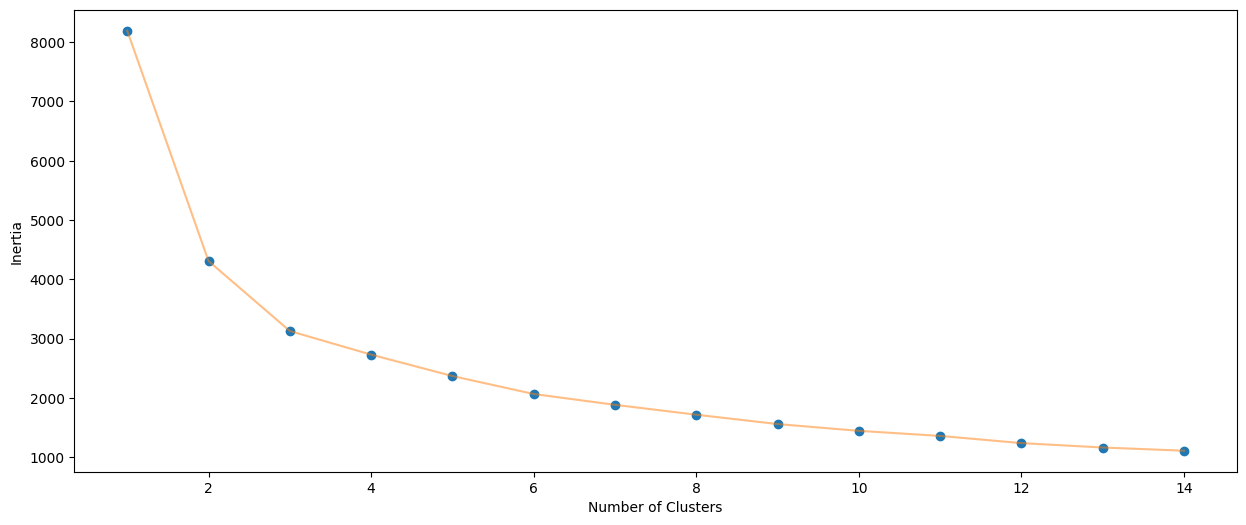

In [ ]:
fig = cl.elbow_plot(data=places_data_standard, cols=places_data_standard.columns, n=15)

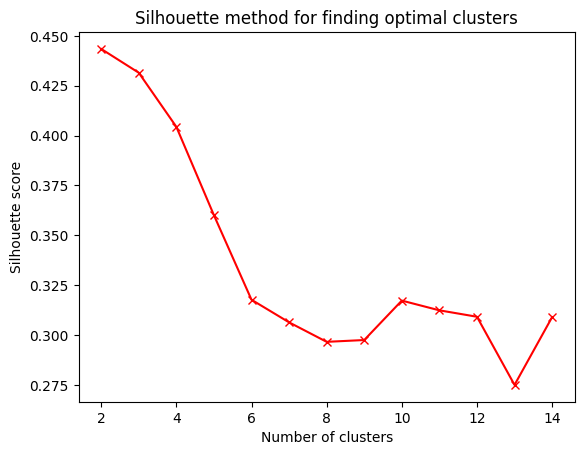

In [ ]:
cl.silhouette_method(data=places_data_standard, cols=places_data_standard.columns, n=15)

In [ ]:
km_places = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=42
)

y_km_places = km_places.fit_predict(places_data_standard)
places_data_standard["kmeans_pca"] = y_km_places

In [ ]:
print(f"Silhouette score for K-Means: {silhouette_score(places_data_standard, y_km_places):.2f}")

Silhouette score for K-Means: 0.51


## 4. Evaluating Agglomerative Clustering Method

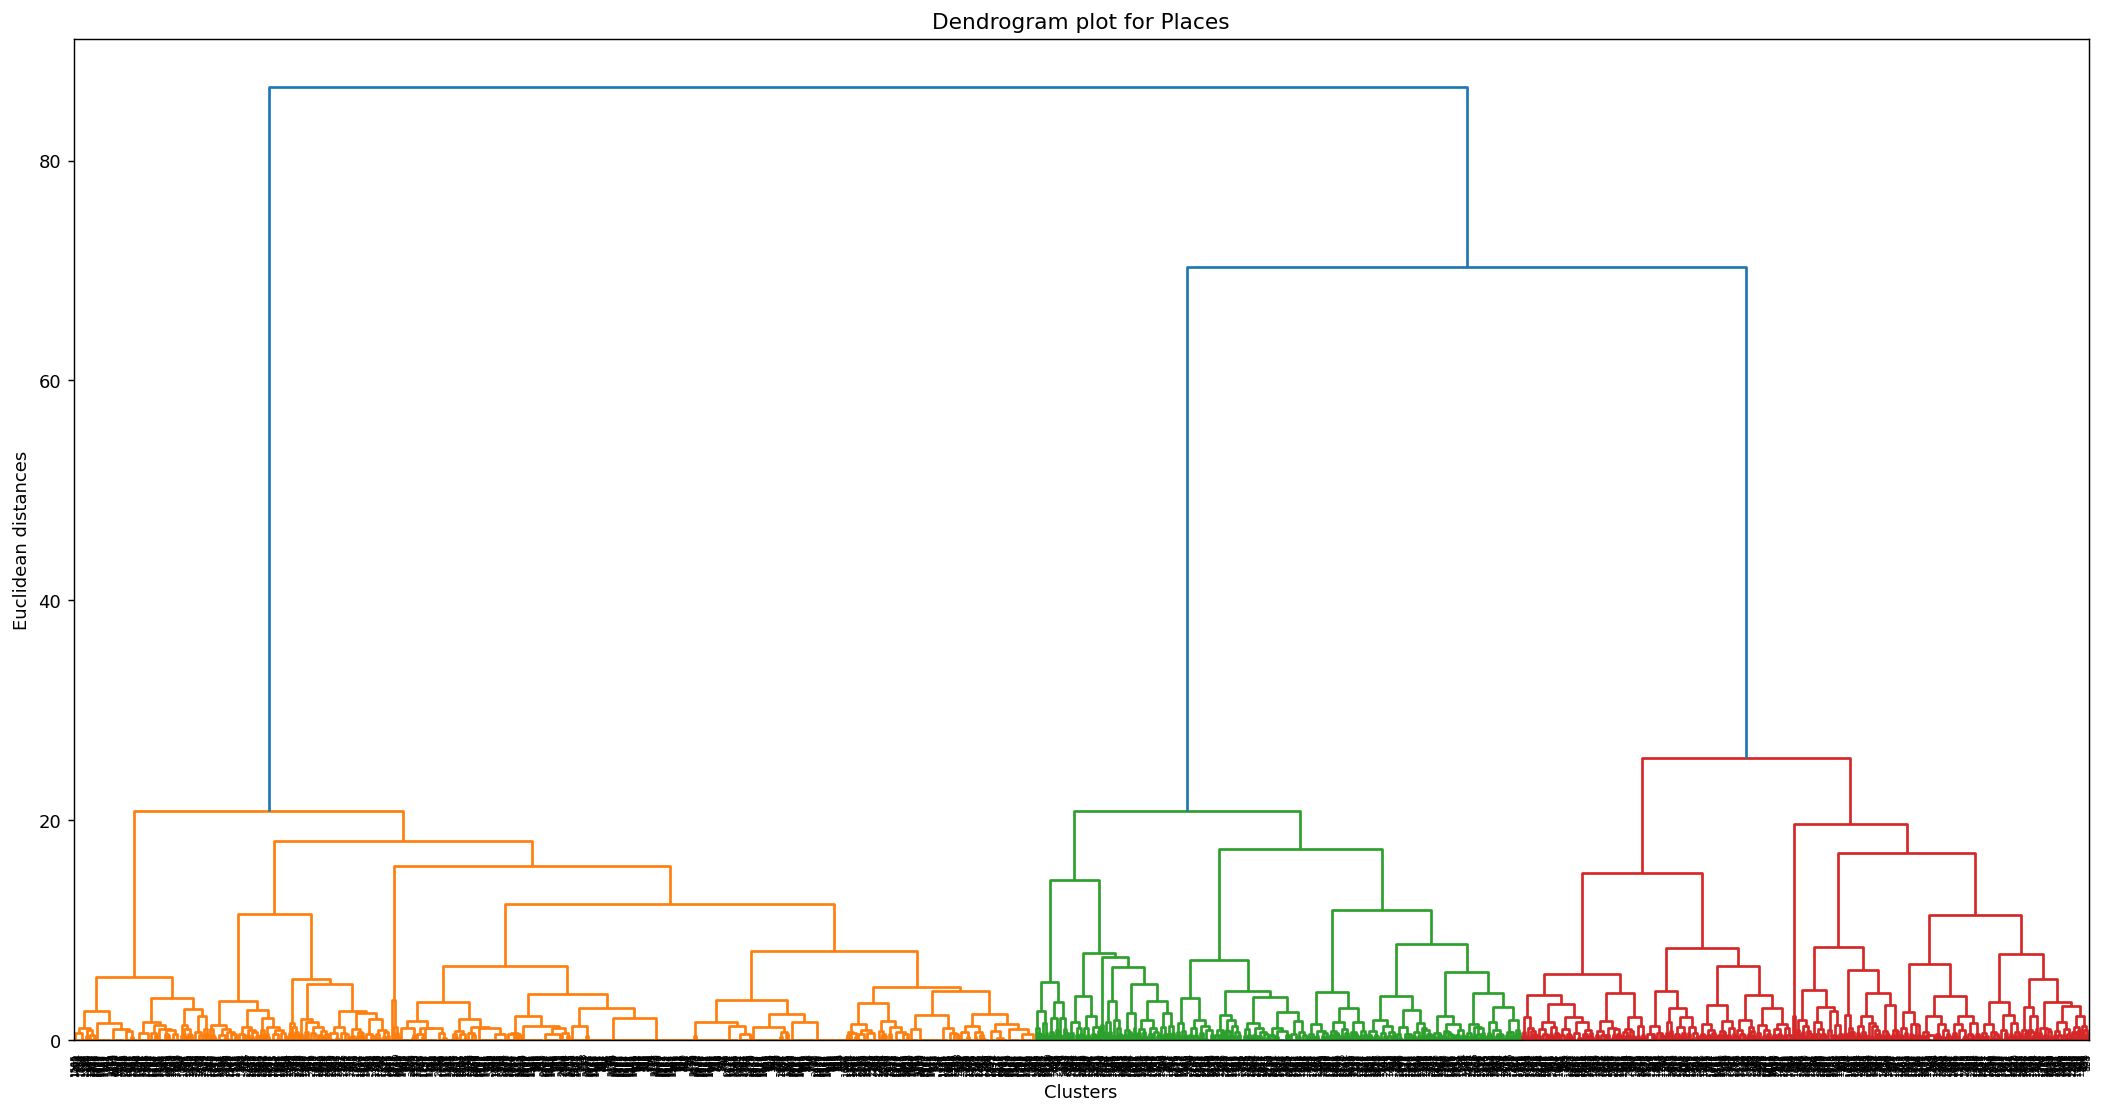

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
dendrogram_plot = dendrogram(linkage(places_data_standard, method="ward"))
plt.title("Dendrogram plot for Places")
plt.xlabel("Clusters")
plt.ylabel("Euclidean distances")
plt.show()

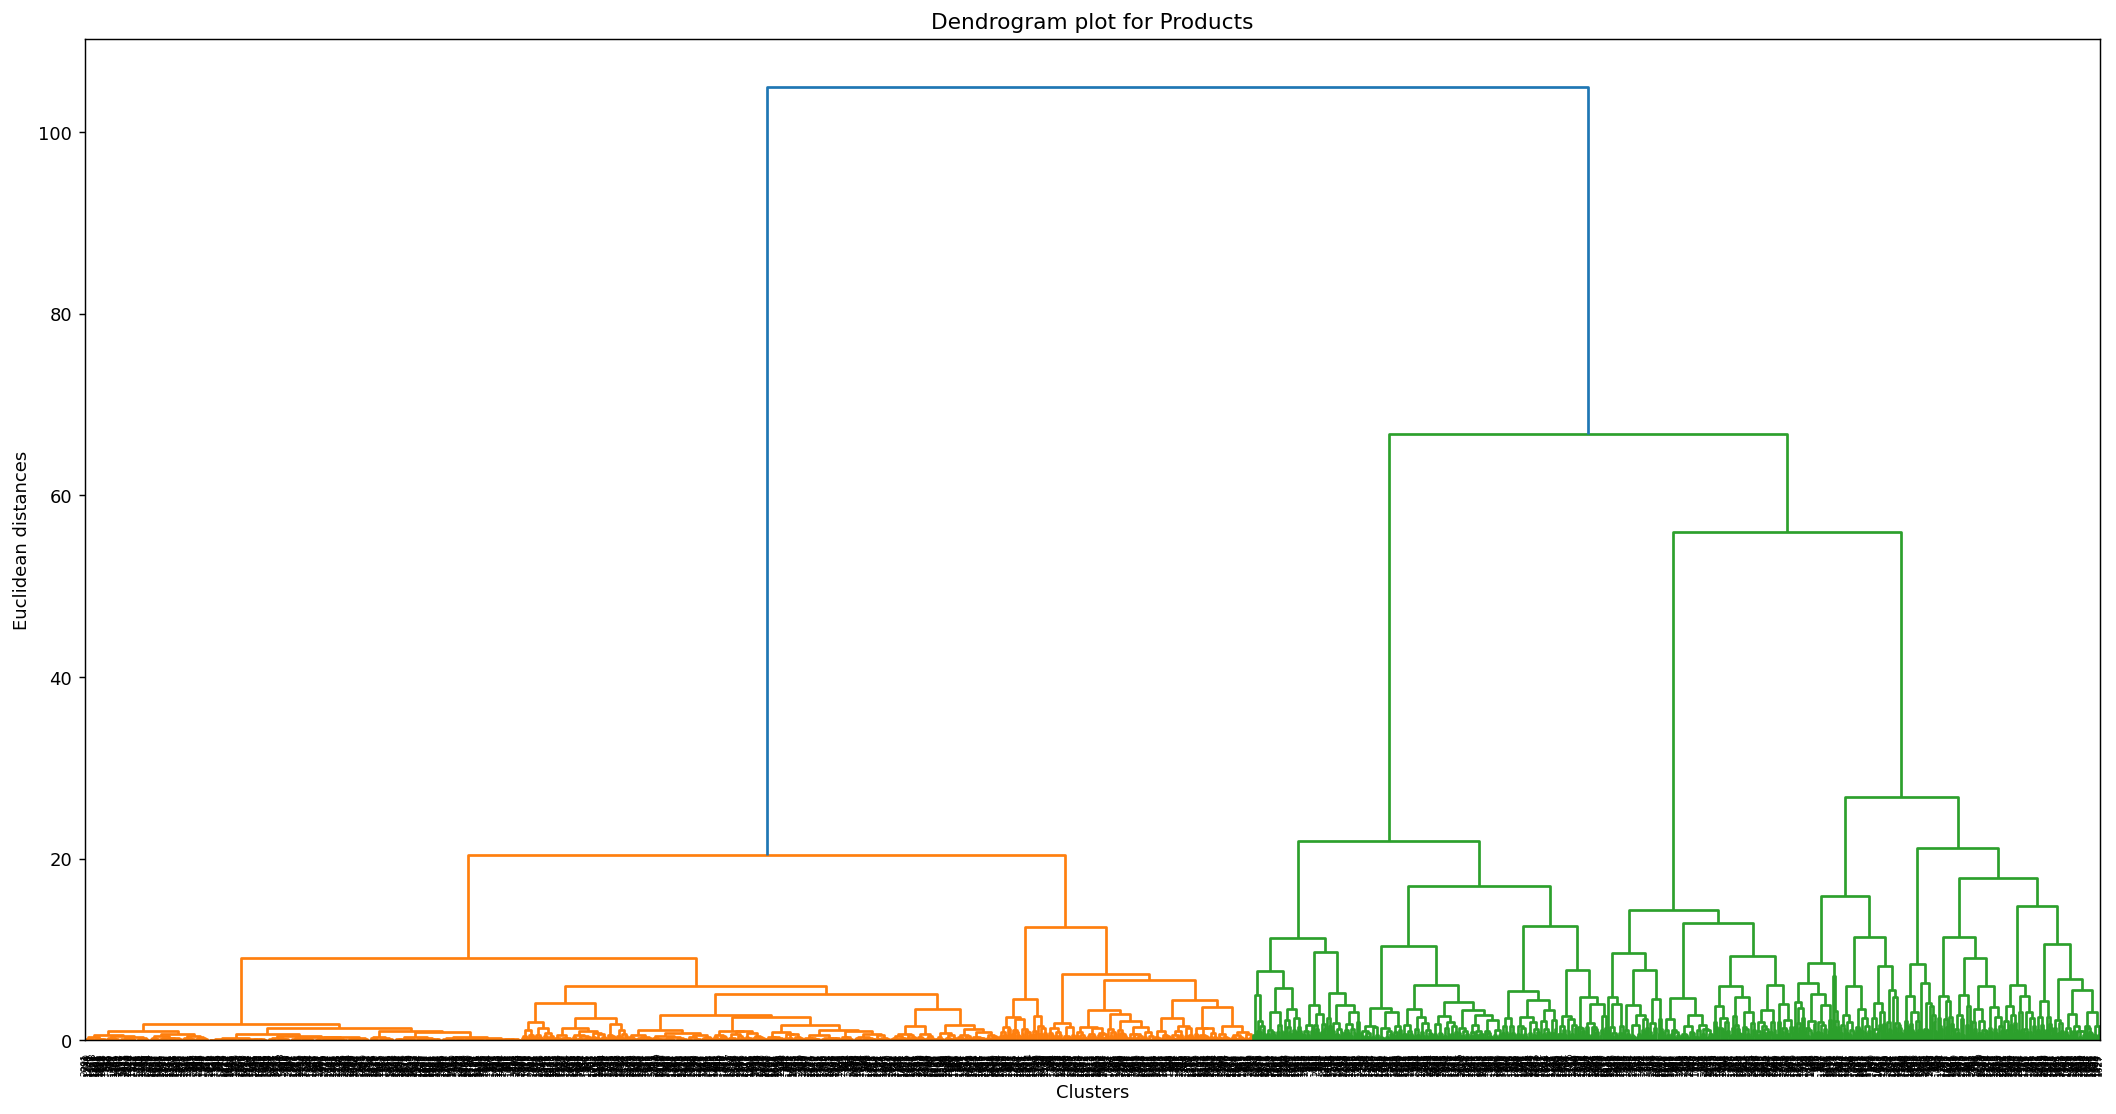

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
dendrogram_plot = dendrogram(linkage(products_data_standard, method="ward"))
plt.title("Dendrogram plot for Products")
plt.xlabel("Clusters")
plt.ylabel("Euclidean distances")
plt.show()

Dendrograms plot for `places` and `products` depict an optimal separation among three first clusters, this is endorsed by highest silhouette score obtained for `K-Means`.

In [ ]:
# Places
hc_places = AgglomerativeClustering(
    n_clusters=3,
    affinity="euclidean",
    linkage="ward"
)

y_hc_places = hc_places.fit_predict(places_data_standard)
places_data_standard["hc_pca"] = y_hc_places

# Products
hc = AgglomerativeClustering(
    n_clusters=3,
    affinity="euclidean",
    linkage="ward"
)

y_hc_products = hc.fit_predict(products_data_standard)
products_data_standard["hc_pca"] = y_hc_products

In [ ]:
print(f"Silhouette score for places_data_standard: {silhouette_score(places_data_standard, y_hc_places):.2f}")
print(f"Silhouette score for products_data_standard: {silhouette_score(products_data_standard, y_hc_products):.2f}")

Silhouette score for places_data_standard: 0.55
Silhouette score for products_data_standard: 0.55


## 5. Evaluating DBSCAN Clustering Method

In [ ]:
# Places
neighbors_places = NearestNeighbors(n_neighbors=2)
neighbors_places.fit(places_data_standard)
distance_places, indices_places = neighbors_places.kneighbors(places_data_standard)

In [ ]:
# Products
neighbors_products = NearestNeighbors(n_neighbors=2)
neighbors_products.fit(products_data_standard)
distance_products, indices_products = neighbors_products.kneighbors(products_data_standard)

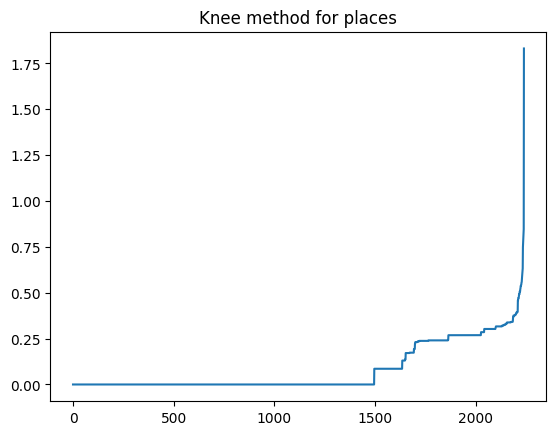

In [ ]:
# Distance in places
distance_places = np.sort(distance_places, axis=0)
distance_places = distance_places[:, 1]
plt.plot(distance_places)
plt.title("Knee method for places")
plt.show()

**Finding for DBSCAN optimal parameters for `places`:**

In [ ]:
# Finding for DBSCAN optimal parameters for places.
eps_values_places = np.arange(0.25, 1, 0.1)
min_values_places = np.arange(3, 12)

places_dbscan_params = list(product(eps_values_places, min_values_places))

no_of_clusters_places = []
sil_scores_places = []
for p in places_dbscan_params:
    dbscan = DBSCAN(eps=p[0], min_samples=p[1])
    y_dbscan = dbscan.fit_predict(places_data_standard)
    try:
        no_of_clusters_places.append(len(np.unique(y_dbscan)))
        sil_scores_places.append(silhouette_score(places_data_standard, y_dbscan))
    except:
        sil_scores_places.append(0)

In [ ]:
places_params_tunning = pd.DataFrame.from_records(
    data=places_dbscan_params,
    columns=["eps", "min_samples"]
)

places_params_tunning["sil_scores"] = sil_scores_places
places_params_tunning["n_clusters"] = no_of_clusters_places

places_params_tunning

,eps,min_samples,sil_scores,n_clusters
0,0.25,3,0.211762,206
1,0.25,4,0.112226,152
2,0.25,5,-0.007116,103
3,0.25,6,-0.087294,76
4,0.25,7,-0.140804,55
...,...,...,...,...
67,0.95,7,0.552513,4
68,0.95,8,0.552513,4
69,0.95,9,0.552513,4
70,0.95,10,0.552513,4


In [ ]:
pivot_places_1 = places_params_tunning.pivot(
    index="min_samples",
    columns="eps",
    values="sil_scores"
)

pivot_places_2 = places_params_tunning.pivot(
    index="min_samples",
    columns="eps",
    values="n_clusters"
)

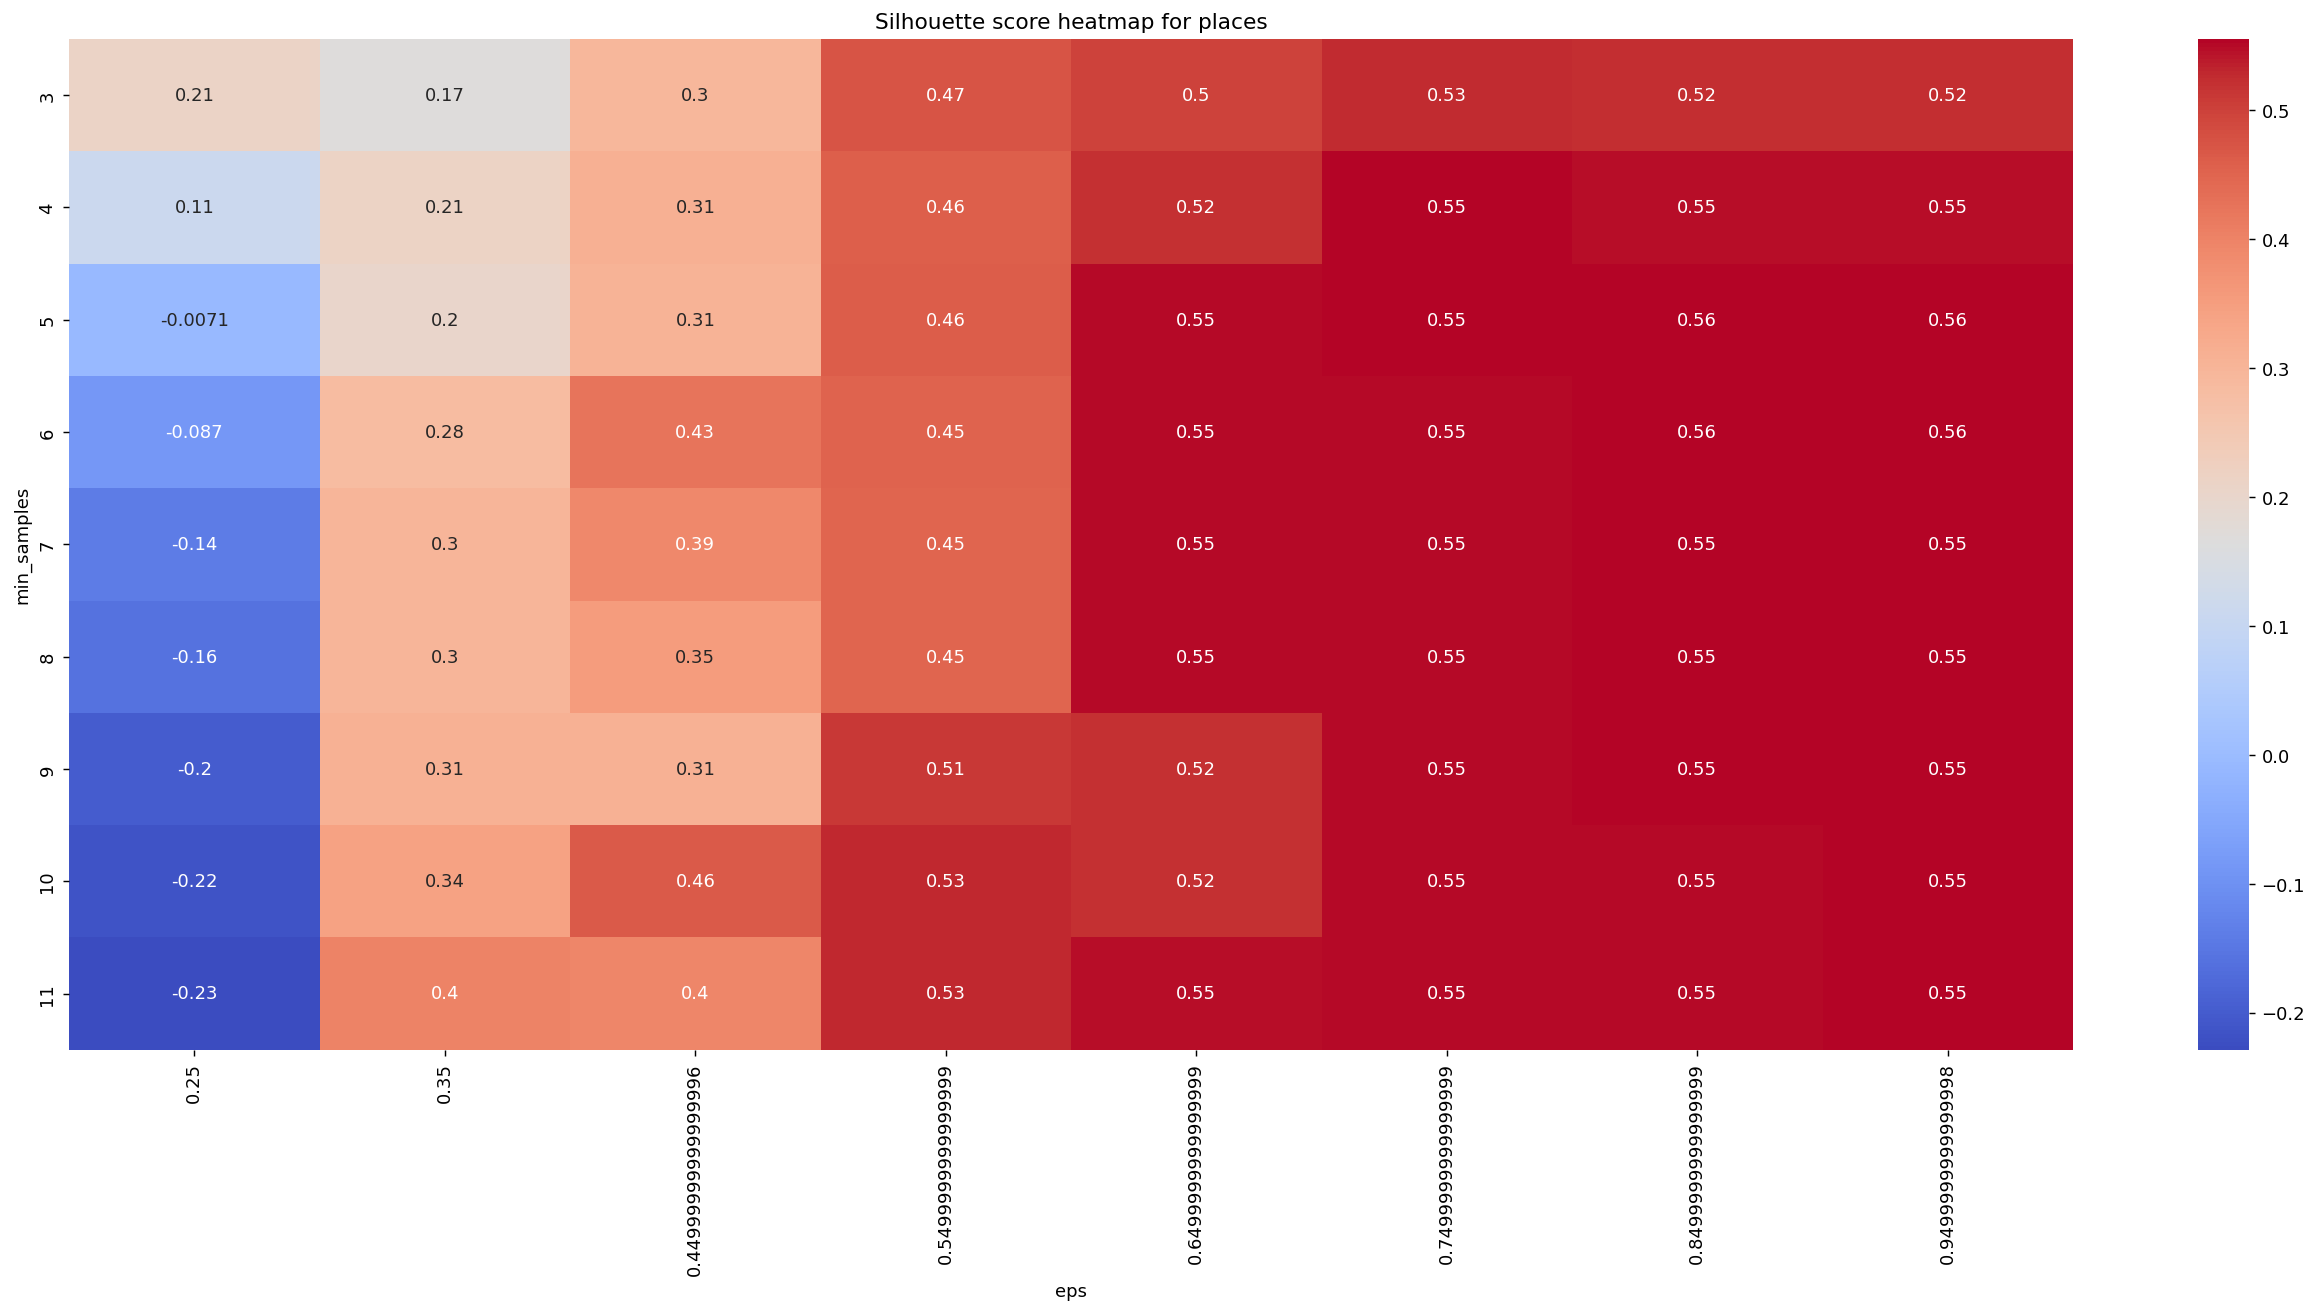

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
sns.heatmap(data=pivot_places_1, annot=True, cmap="coolwarm", annot_kws={"size": 10})
plt.tight_layout()
plt.title("Silhouette score heatmap for places")
plt.show()

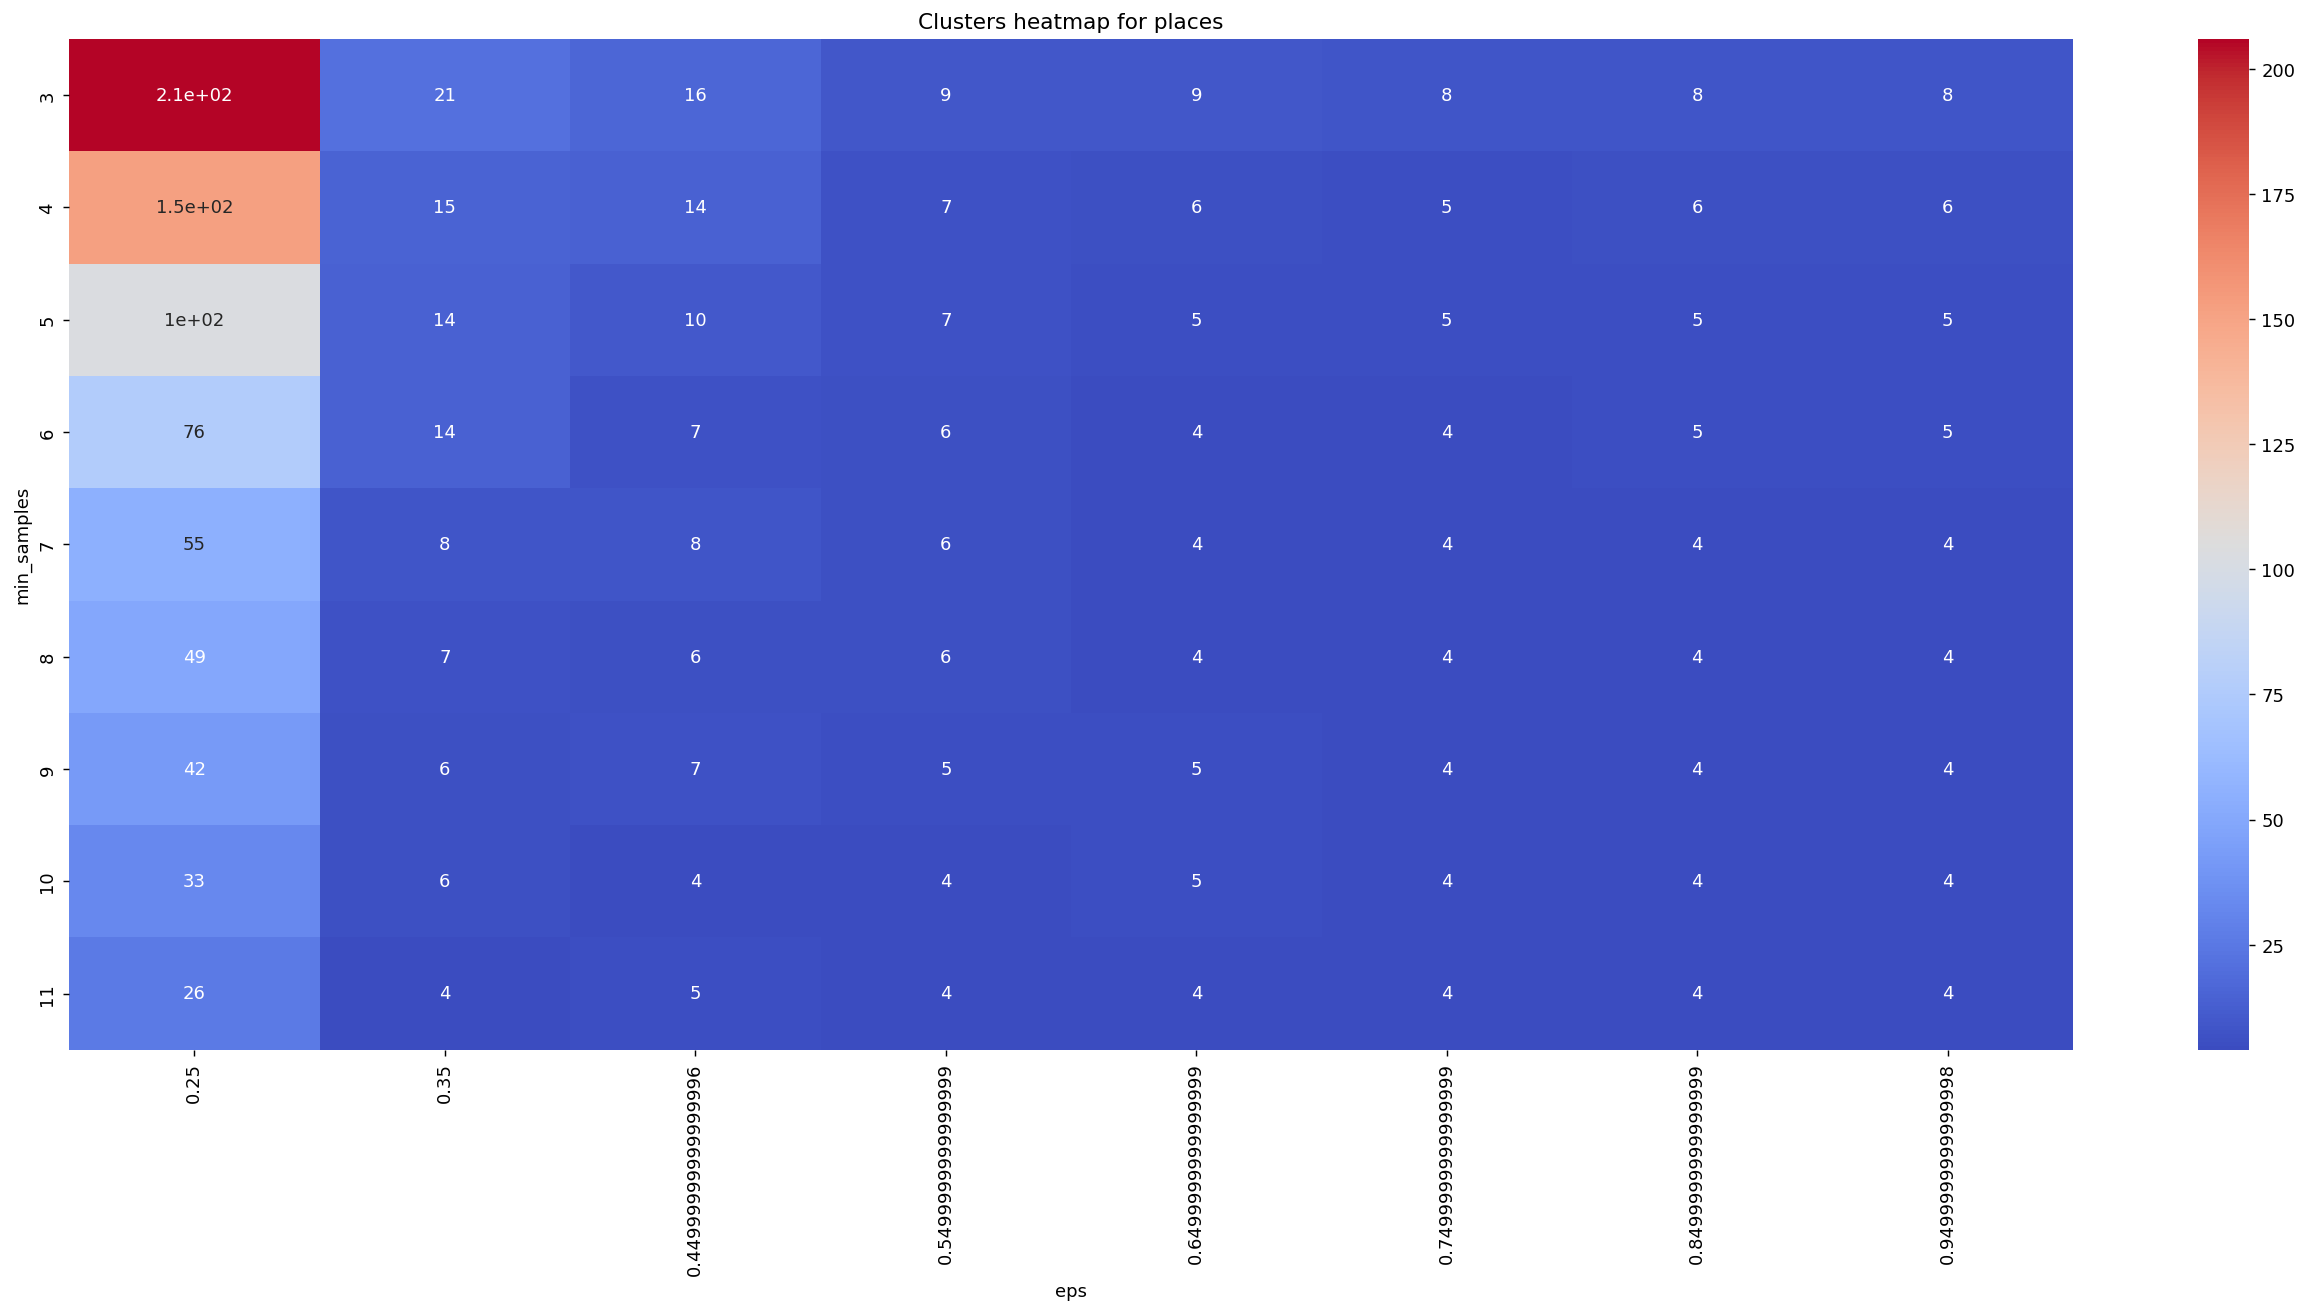

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
sns.heatmap(data=pivot_places_2, annot=True, cmap="coolwarm", annot_kws={"size": 10})
plt.tight_layout()
plt.title("Clusters heatmap for places")
plt.show()

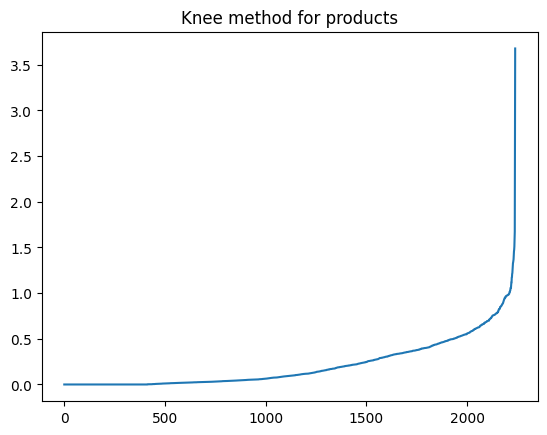

In [ ]:
# Distance in products
distance_products = np.sort(distance_products, axis=0)
distance_products = distance_products[:, 1]
plt.plot(distance_products)
plt.title("Knee method for products")
plt.show()

**Finding for DBSCAN optimal parameters for `products`:**

In [ ]:
# Finding for DBSCAN optimal parameters for products.
eps_values_products = np.arange(0.5, 2, 0.1)
min_samples_products = np.arange(3, 12, 1)

products_params_dbscan = list(product(eps_values_products, min_samples_products))

no_of_clusters_products = []
sil_scores_products = []
for p in products_params_dbscan:
    dbscan = DBSCAN(eps=p[0], min_samples=p[1])
    y_dbscan = dbscan.fit_predict(products_data_standard)
    try:
        no_of_clusters_products.append(len(np.unique(y_dbscan)))
        sil_scores_products.append(silhouette_score(products_data_standard, y_dbscan))
    except:
        sil_scores_products.append(0)

products_params_tunning = pd.DataFrame.from_records(
    data=products_params_dbscan,
    columns=["eps", "min_samples"]
)

products_params_tunning["sil_scores"] = sil_scores_products
products_params_tunning["n_clusters"] = no_of_clusters_products

products_params_tunning

,eps,min_samples,sil_scores,n_clusters
0,0.5,3,0.327744,42
1,0.5,4,0.289813,24
2,0.5,5,0.305492,16
3,0.5,6,0.143661,13
4,0.5,7,0.282228,10
...,...,...,...,...
130,1.9,7,0.603965,2
131,1.9,8,0.603965,2
132,1.9,9,0.603965,2
133,1.9,10,0.603965,2


In [ ]:
pivot_products_1 = products_params_tunning.pivot(
    index="min_samples",
    columns="eps",
    values="sil_scores"
)
pivot_products_1

eps,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
min_samples,,,,,,,,,,,,,,,
3,0.327744,0.387905,0.403034,0.471674,0.504484,0.537001,0.535993,0.517714,0.529346,0.543443,0.519432,0.579715,0.603965,0.603965,0.603965
4,0.289813,0.380753,0.380622,0.466001,0.508928,0.535177,0.554121,0.518086,0.528111,0.542528,0.519432,0.579715,0.603965,0.603965,0.603965
5,0.305492,0.370980,0.385006,0.490200,0.513581,0.549370,0.570636,0.540478,0.525318,0.541197,0.518612,0.579715,0.603965,0.603965,0.603965
6,0.143661,0.336743,0.396043,0.483035,0.511879,0.523210,0.577046,0.539194,0.539952,0.543133,0.514354,0.579715,0.603965,0.603965,0.603965
7,0.282228,0.344505,0.390493,0.437404,0.513524,0.530923,0.574957,0.538518,0.539638,0.542840,0.512946,0.537402,0.603965,0.603965,0.603965
8,0.271319,0.363857,0.391795,0.494739,0.521137,0.523003,0.574384,0.529703,0.539076,0.542038,0.515095,0.524240,0.603965,0.603965,0.603965
9,0.380026,0.347981,0.441115,0.455807,0.517037,0.557719,0.549786,0.528557,0.528453,0.540978,0.513499,0.521197,0.603965,0.603965,0.603965
10,0.332244,0.339699,0.434736,0.460003,0.518382,0.536458,0.568631,0.540508,0.528050,0.540978,0.511718,0.521197,0.526911,0.603965,0.603965
11,0.326367,0.328023,0.425105,0.442079,0.506992,0.535194,0.565686,0.540804,0.540715,0.528898,0.510887,0.515702,0.530860,0.603965,0.603965


In [ ]:
pivot_products_2 = products_params_tunning.pivot(
    index="min_samples",
    columns="eps",
    values="n_clusters"
)

pivot_products_2

eps,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
min_samples,,,,,,,,,,,,,,,
3,42,42,35,21,14,12,11,6,5,4,3,2,2,2,2
4,24,22,24,14,11,12,8,6,5,4,3,2,2,2,2
5,16,15,14,9,9,9,6,4,5,4,3,2,2,2,2
6,13,14,14,10,9,8,5,4,4,4,3,2,2,2,2
7,10,10,13,11,8,7,5,4,4,4,3,2,2,2,2
8,8,6,9,6,6,8,5,5,4,4,3,2,2,2,2
9,4,7,5,8,6,5,6,5,5,4,3,2,2,2,2
10,6,6,5,7,6,6,5,4,5,4,3,2,2,2,2
11,6,6,5,8,6,6,5,4,4,5,3,2,2,2,2


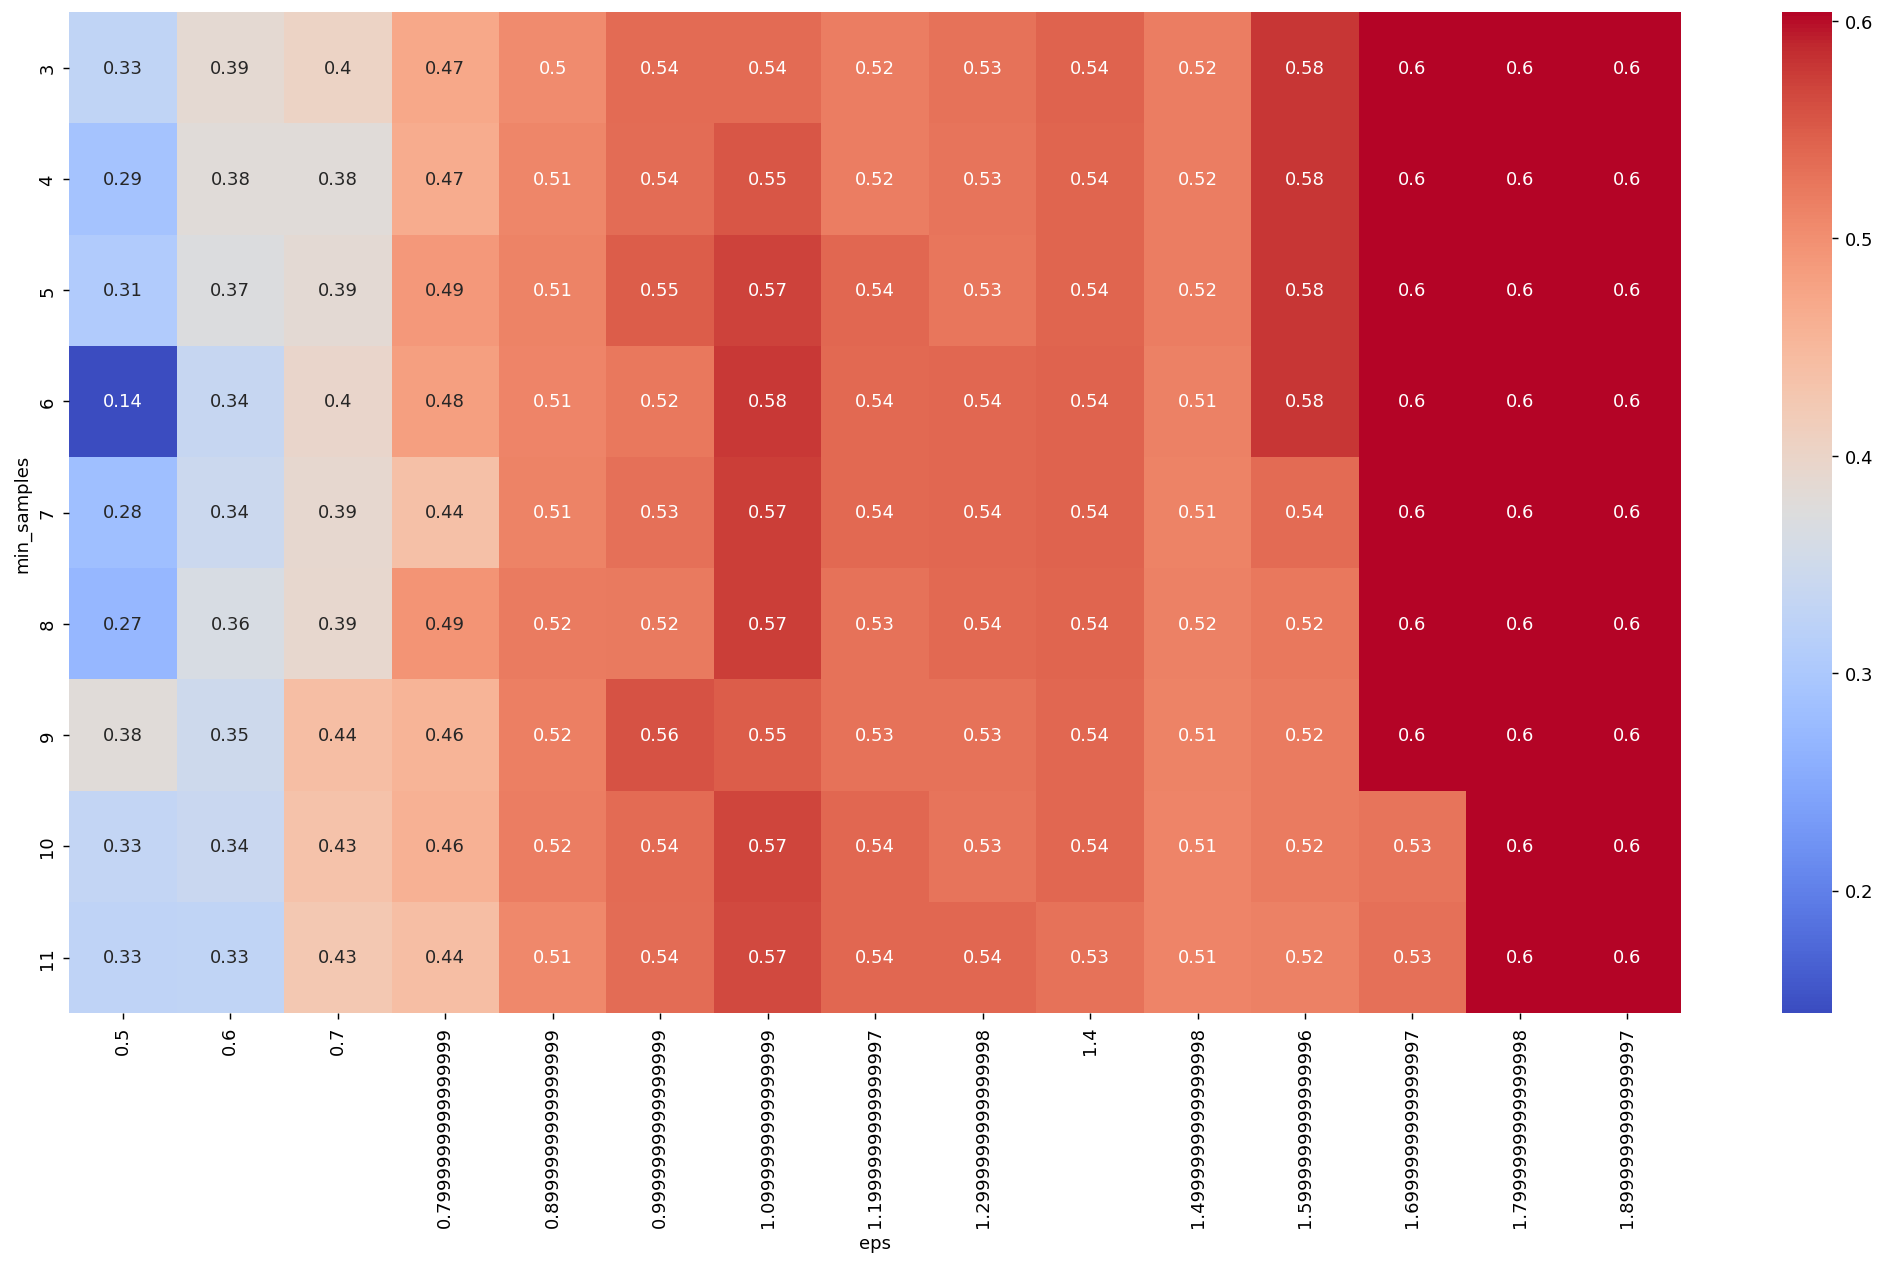

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
sns.heatmap(data=pivot_products_1, annot=True, cmap="coolwarm", annot_kws={"size": 10})
plt.show()

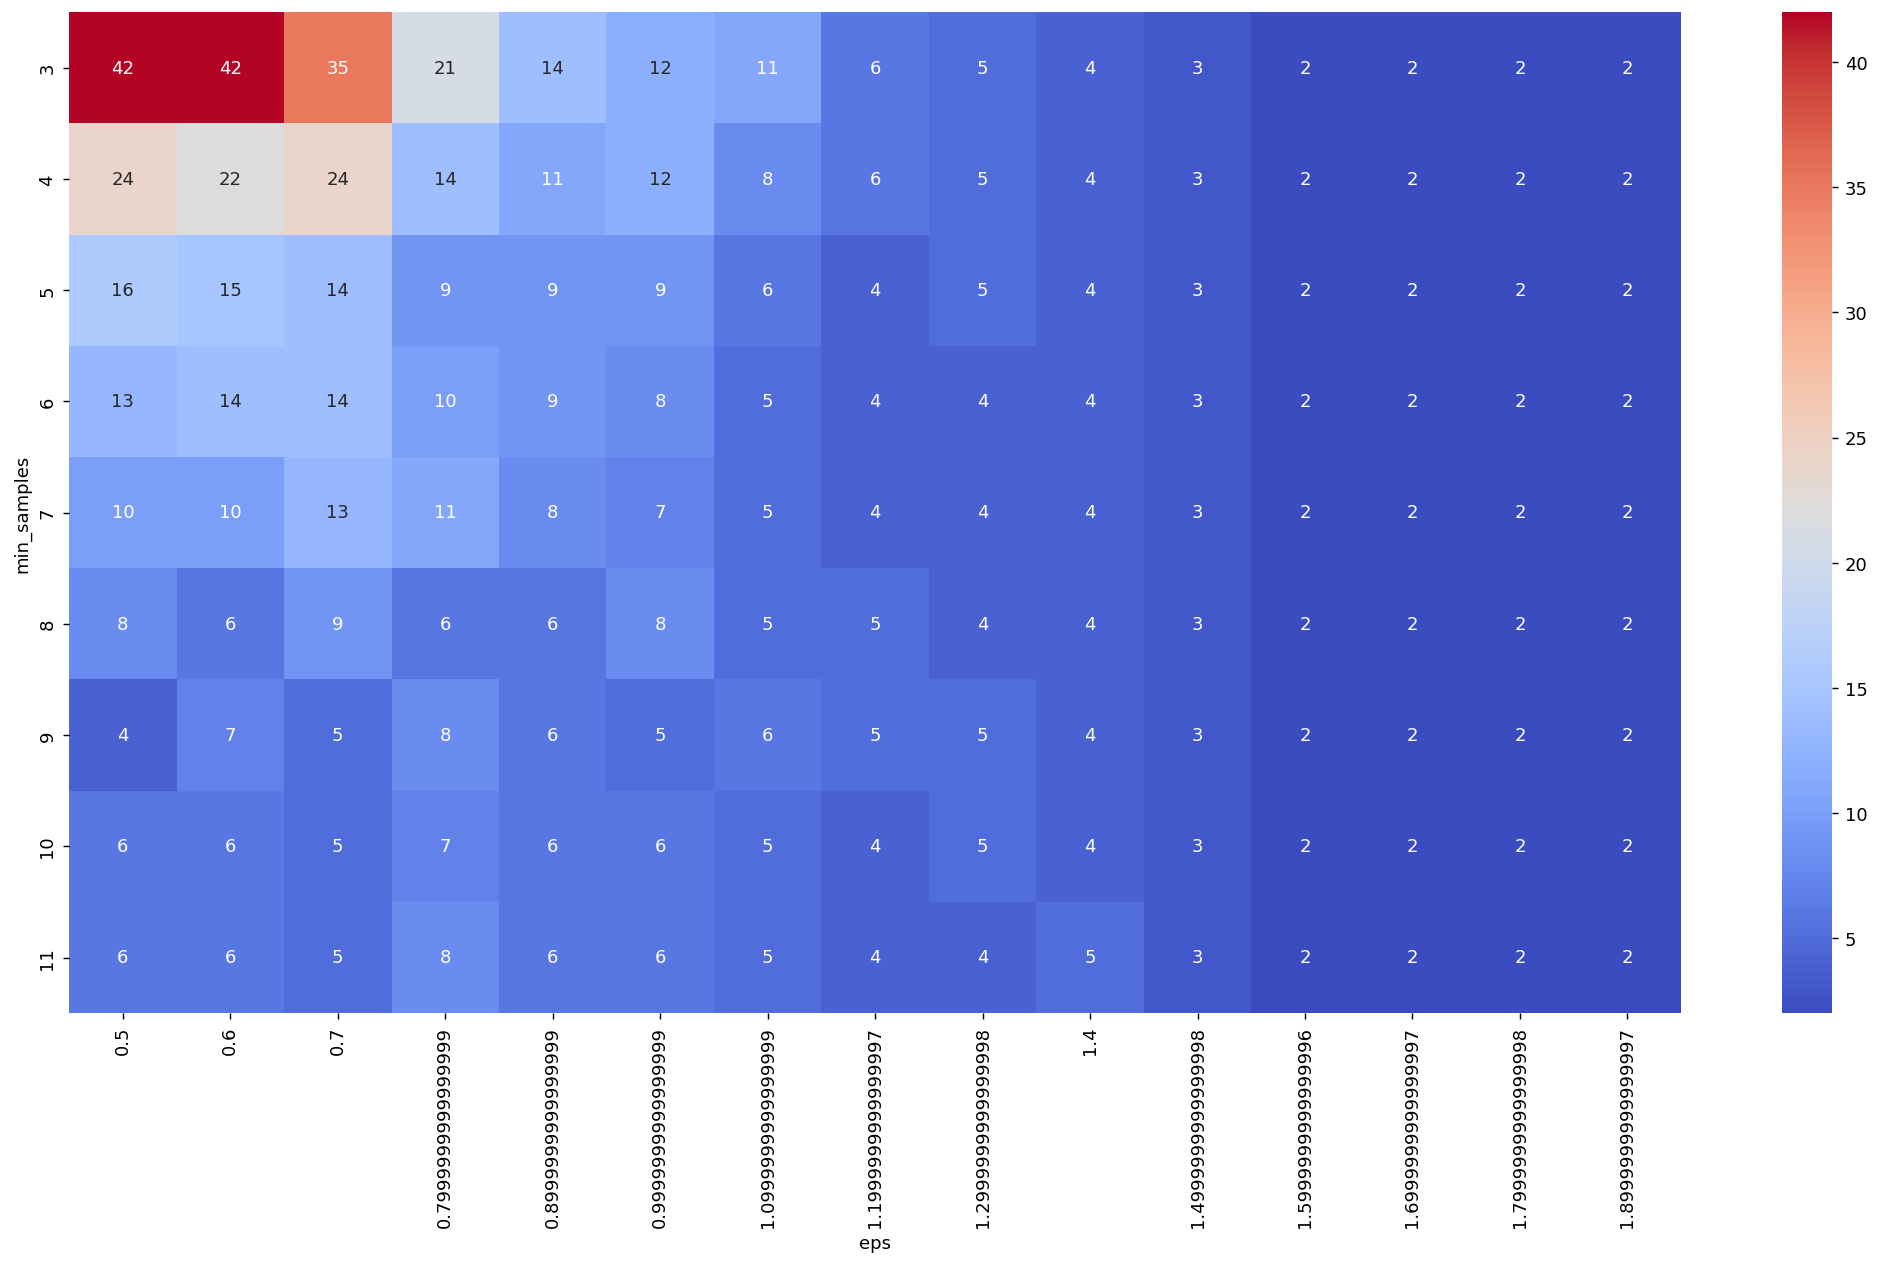

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
sns.heatmap(data=pivot_products_2, annot=True, cmap="coolwarm", annot_kws={"size": 10})
plt.show()

Silhouette scores for places and products are similar, close to 0.6, wrapping them up:

`places`: 0.56, `products`: 0.60

In [ ]:
dbscan_places = DBSCAN(
    eps = 0.85,
    min_samples= 5
)

places_dbscan_pred = dbscan_places.fit_predict(places_data_standard)
print(f"Silhouette score for places: {silhouette_score(places_data_standard, places_dbscan_pred):.2f}")

Silhouette score for places: 0.56


In [ ]:
dbscan_products = DBSCAN(
    eps = 0.85,
    min_samples= 5
)

products_dbscan_pred = dbscan_places.fit_predict(products_data_standard)
print(f"Silhouette score for places: {silhouette_score(products_data_standard, products_dbscan_pred):.2f}")

Silhouette score for places: 0.49


In [ ]:
places_data_standard["dbscan_pca"] = places_dbscan_pred
products_data_standard["dbscan_pca"] = products_dbscan_pred

## 6. Visualizing Clusters

### 6.1 `Places`

In [ ]:
places_data_standard.iloc[:, :3].columns

Index(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], dtype='object')

<Figure size 2600x1300 with 0 Axes>

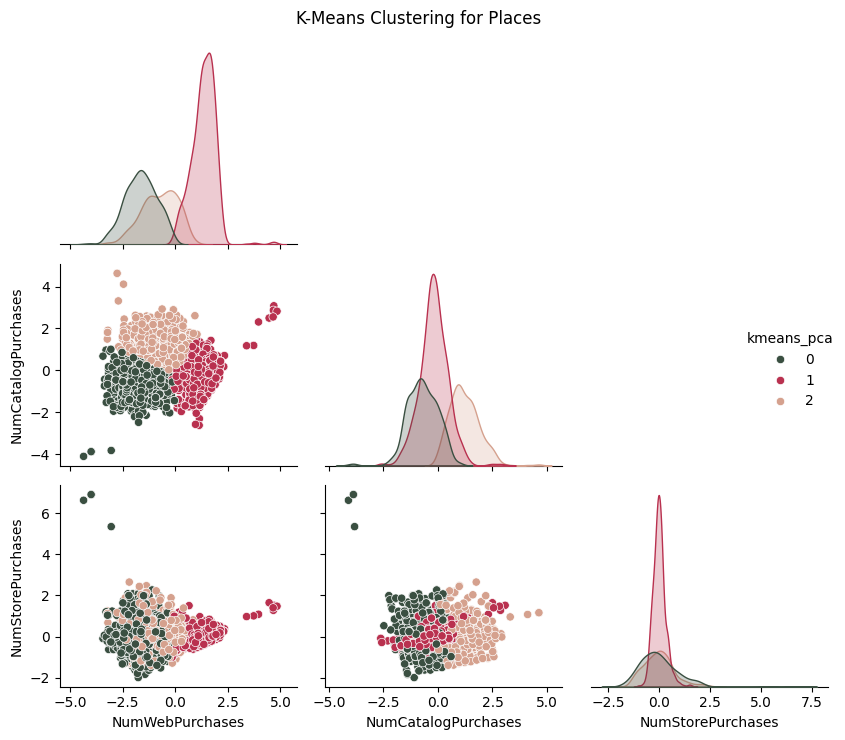

In [ ]:
# K-Means for Places
km_palette = ["#3A4F41", "#B9314F", "#D5A18E"]
plt.figure(figsize=(20,10), dpi=130)
sns.pairplot(
    data=places_data_standard[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'kmeans_pca']], 
    hue="kmeans_pca", 
    palette=km_palette, 
    corner=True
)
plt.suptitle("K-Means Clustering for Places")
plt.tight_layout()
plt.show()

<Figure size 2600x1300 with 0 Axes>

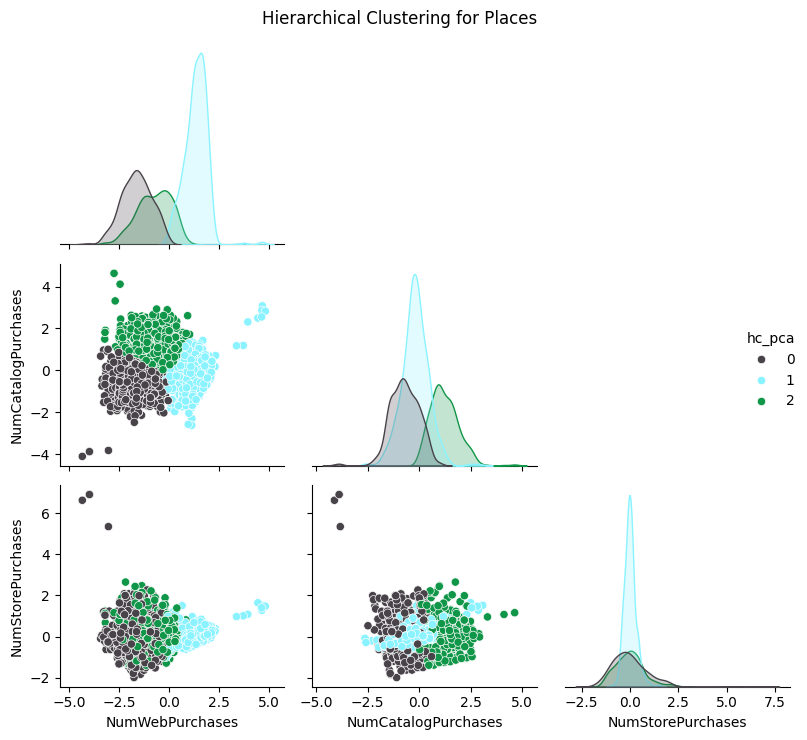

In [ ]:
# Agglomerative Clustering for Places
hc_palette = ["#484349", "#8AF3FF", "#109648"]
plt.figure(figsize=(20,10), dpi=130)
sns.pairplot(
    data=places_data_standard[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'hc_pca']], 
    hue="hc_pca", 
    palette=hc_palette,
    corner=True
    )
plt.suptitle("Hierarchical Clustering for Places")
plt.tight_layout()
plt.show()

<Figure size 2600x1300 with 0 Axes>

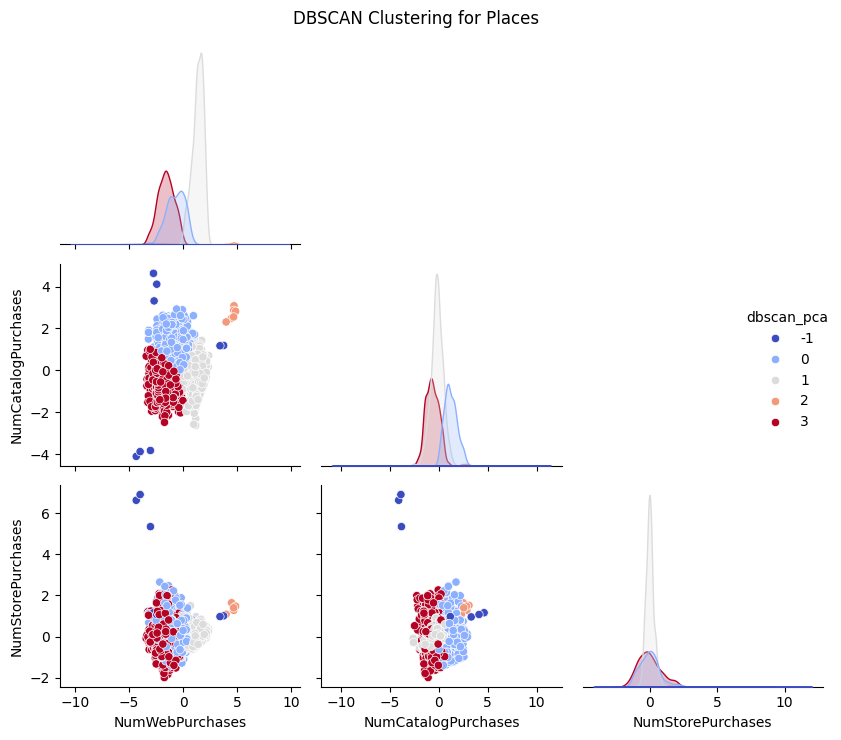

In [ ]:
#DBSCAN Clustering for Places
plt.figure(figsize=(20,10), dpi=130)
sns.pairplot(
    data=places_data_standard[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'dbscan_pca']], 
    hue="dbscan_pca", 
    palette="coolwarm",
    corner=True
    )
plt.suptitle("DBSCAN Clustering for Places")
plt.tight_layout()
plt.show()

### 6.2 `Products`

In [ ]:
products_data_standard.columns

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'kmeans_pca', 'hc_pca', 'dbscan_pca'],
      dtype='object')

<Figure size 2600x1300 with 0 Axes>

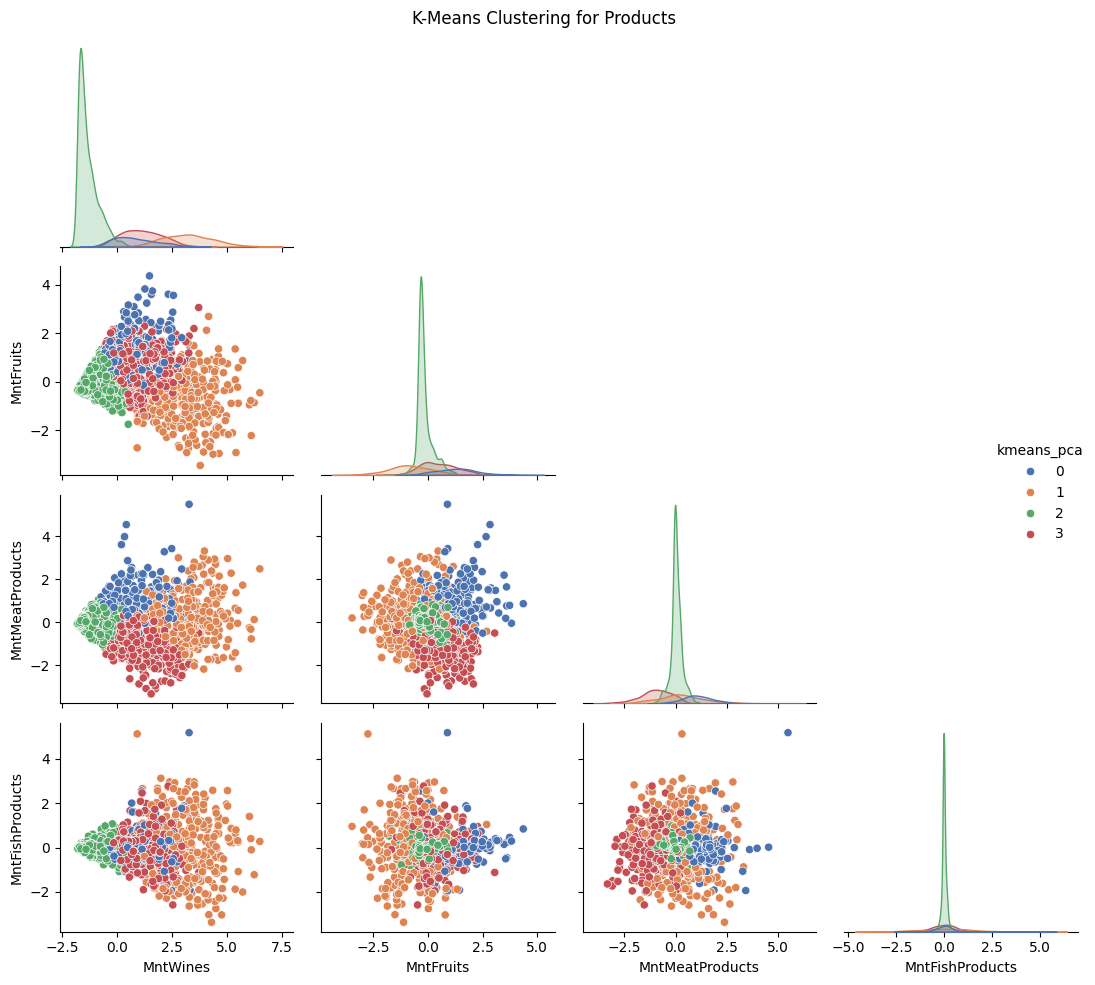

In [ ]:
# K-Means Clustering for Products
plt.figure(figsize=(20,10), dpi=130)
sns.pairplot(
    data=products_data_standard[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'kmeans_pca']],
    hue="kmeans_pca",
    palette="deep",
    corner=True
)
plt.suptitle("K-Means Clustering for Products")
plt.tight_layout()
plt.show()

<Figure size 2600x1300 with 0 Axes>

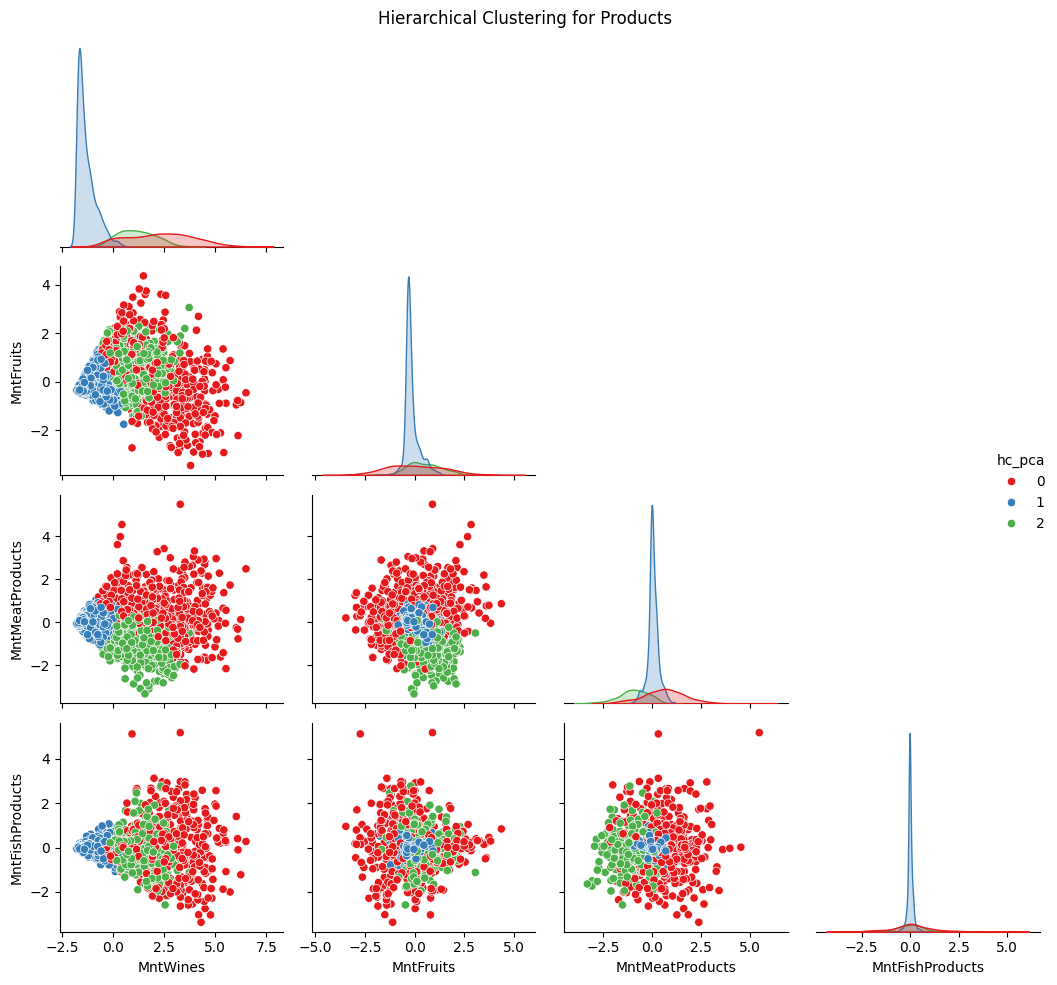

In [ ]:
# Agglomerative Clustering for Products
plt.figure(figsize=(20,10), dpi=130)
sns.pairplot(
    data=products_data_standard[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'hc_pca']],
    hue="hc_pca",
    palette="Set1",
    corner=True
)
plt.suptitle("Hierarchical Clustering for Products")
plt.tight_layout()
plt.show()

<Figure size 2600x1300 with 0 Axes>

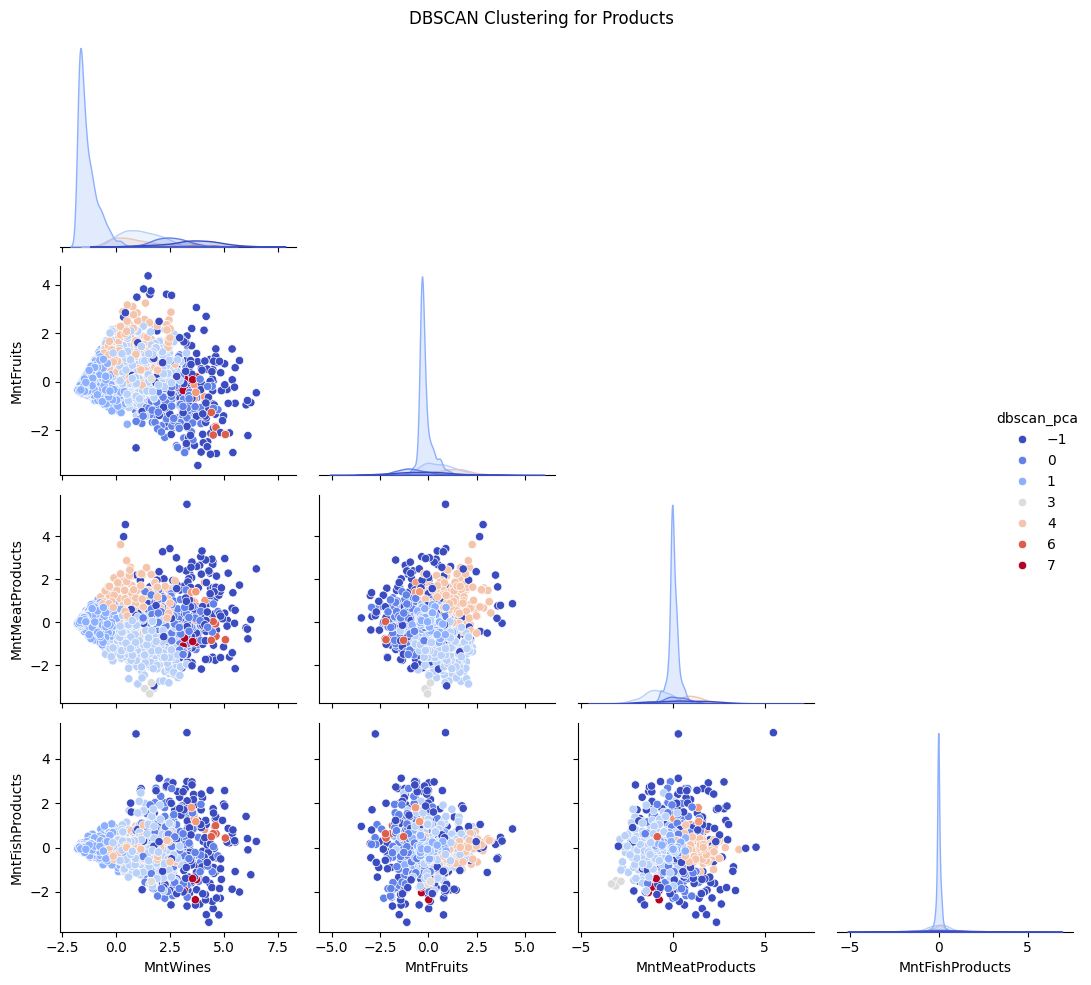

In [ ]:
# DBSCAN Clustering for Products
plt.figure(figsize=(20,10), dpi=130)
sns.pairplot(
    data=products_data_standard[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'dbscan_pca']],
    hue="dbscan_pca",
    palette="coolwarm",
    corner=True
)
plt.suptitle("DBSCAN Clustering for Products")
plt.tight_layout()
plt.show()

## 7. Analysis

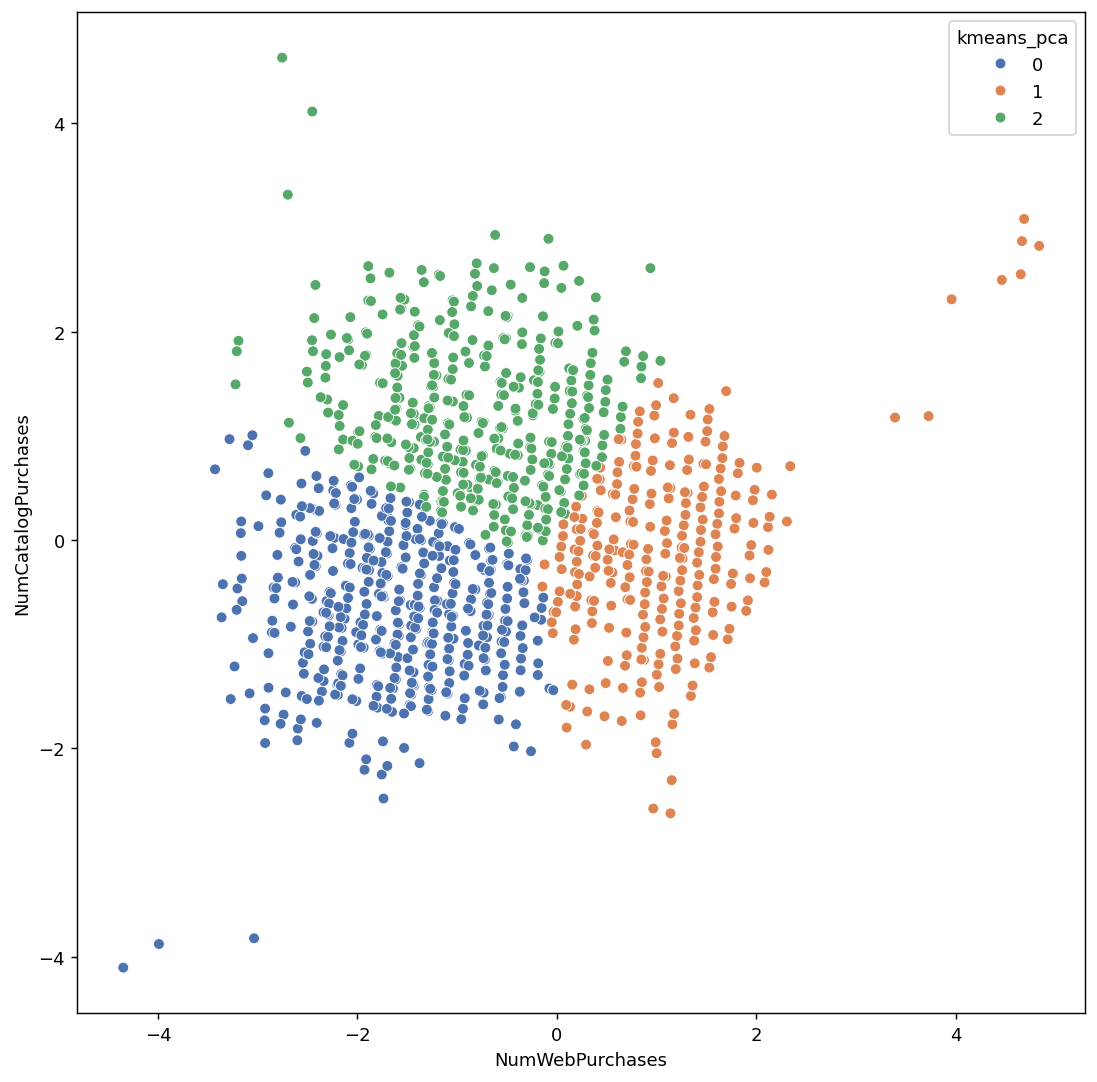

In [ ]:
plt.figure(figsize=(10,10), dpi=130)
sns.scatterplot(
    data=places_data_standard,
    x="NumWebPurchases",
    y="NumCatalogPurchases",
    hue="kmeans_pca",
    palette="deep"
)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49a4b13f-b86e-4dbe-8cae-5dc522a92da6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>